# 1- Perkenalan

>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai

- Nama : Didit Eko Setyo Ariandi
- batch : 015 
- dataset : airline satiefied
- objective : membuat sebuah model machine learning dengan beberapa pilihan kasus dan panduan yang harus diikuti berikut ini..

# 2- Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [381]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
from sklearn.model_selection import GridSearchCV,cross_val_score
import joblib

# 3-  Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [21]:
#load dataset
df = pd.read_csv('airline.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [22]:
#duplicate
df1=df.copy()

In [24]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

statement :
- jenis type data terdiri dari 1 float, 5 string/object, 19 integer
- bisa dilihat dari info data di atas ternyata  terdapat missing value pada column arrival delay in minutes

In [25]:
#cekdataset2
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25976.0,12987.500000,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,65005.657992,37611.526647,17.0,32170.50,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.00,40.0,51.00,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.00,849.0,1744.00,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.00,3.0,4.00,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.00,3.0,4.00,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.00,3.0,4.00,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.00,4.0,4.00,5.0


-karena dataset memiliki column unnamed yang berisi index maka di putuskan untuk drop column unnamed0

In [26]:
#drop column unnamend
df.drop('Unnamed: 0', inplace=True, axis=1)

In [27]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Dataset description
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)



# 4. Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [43]:
#Matikan warnings
warnings.filterwarnings('ignore')

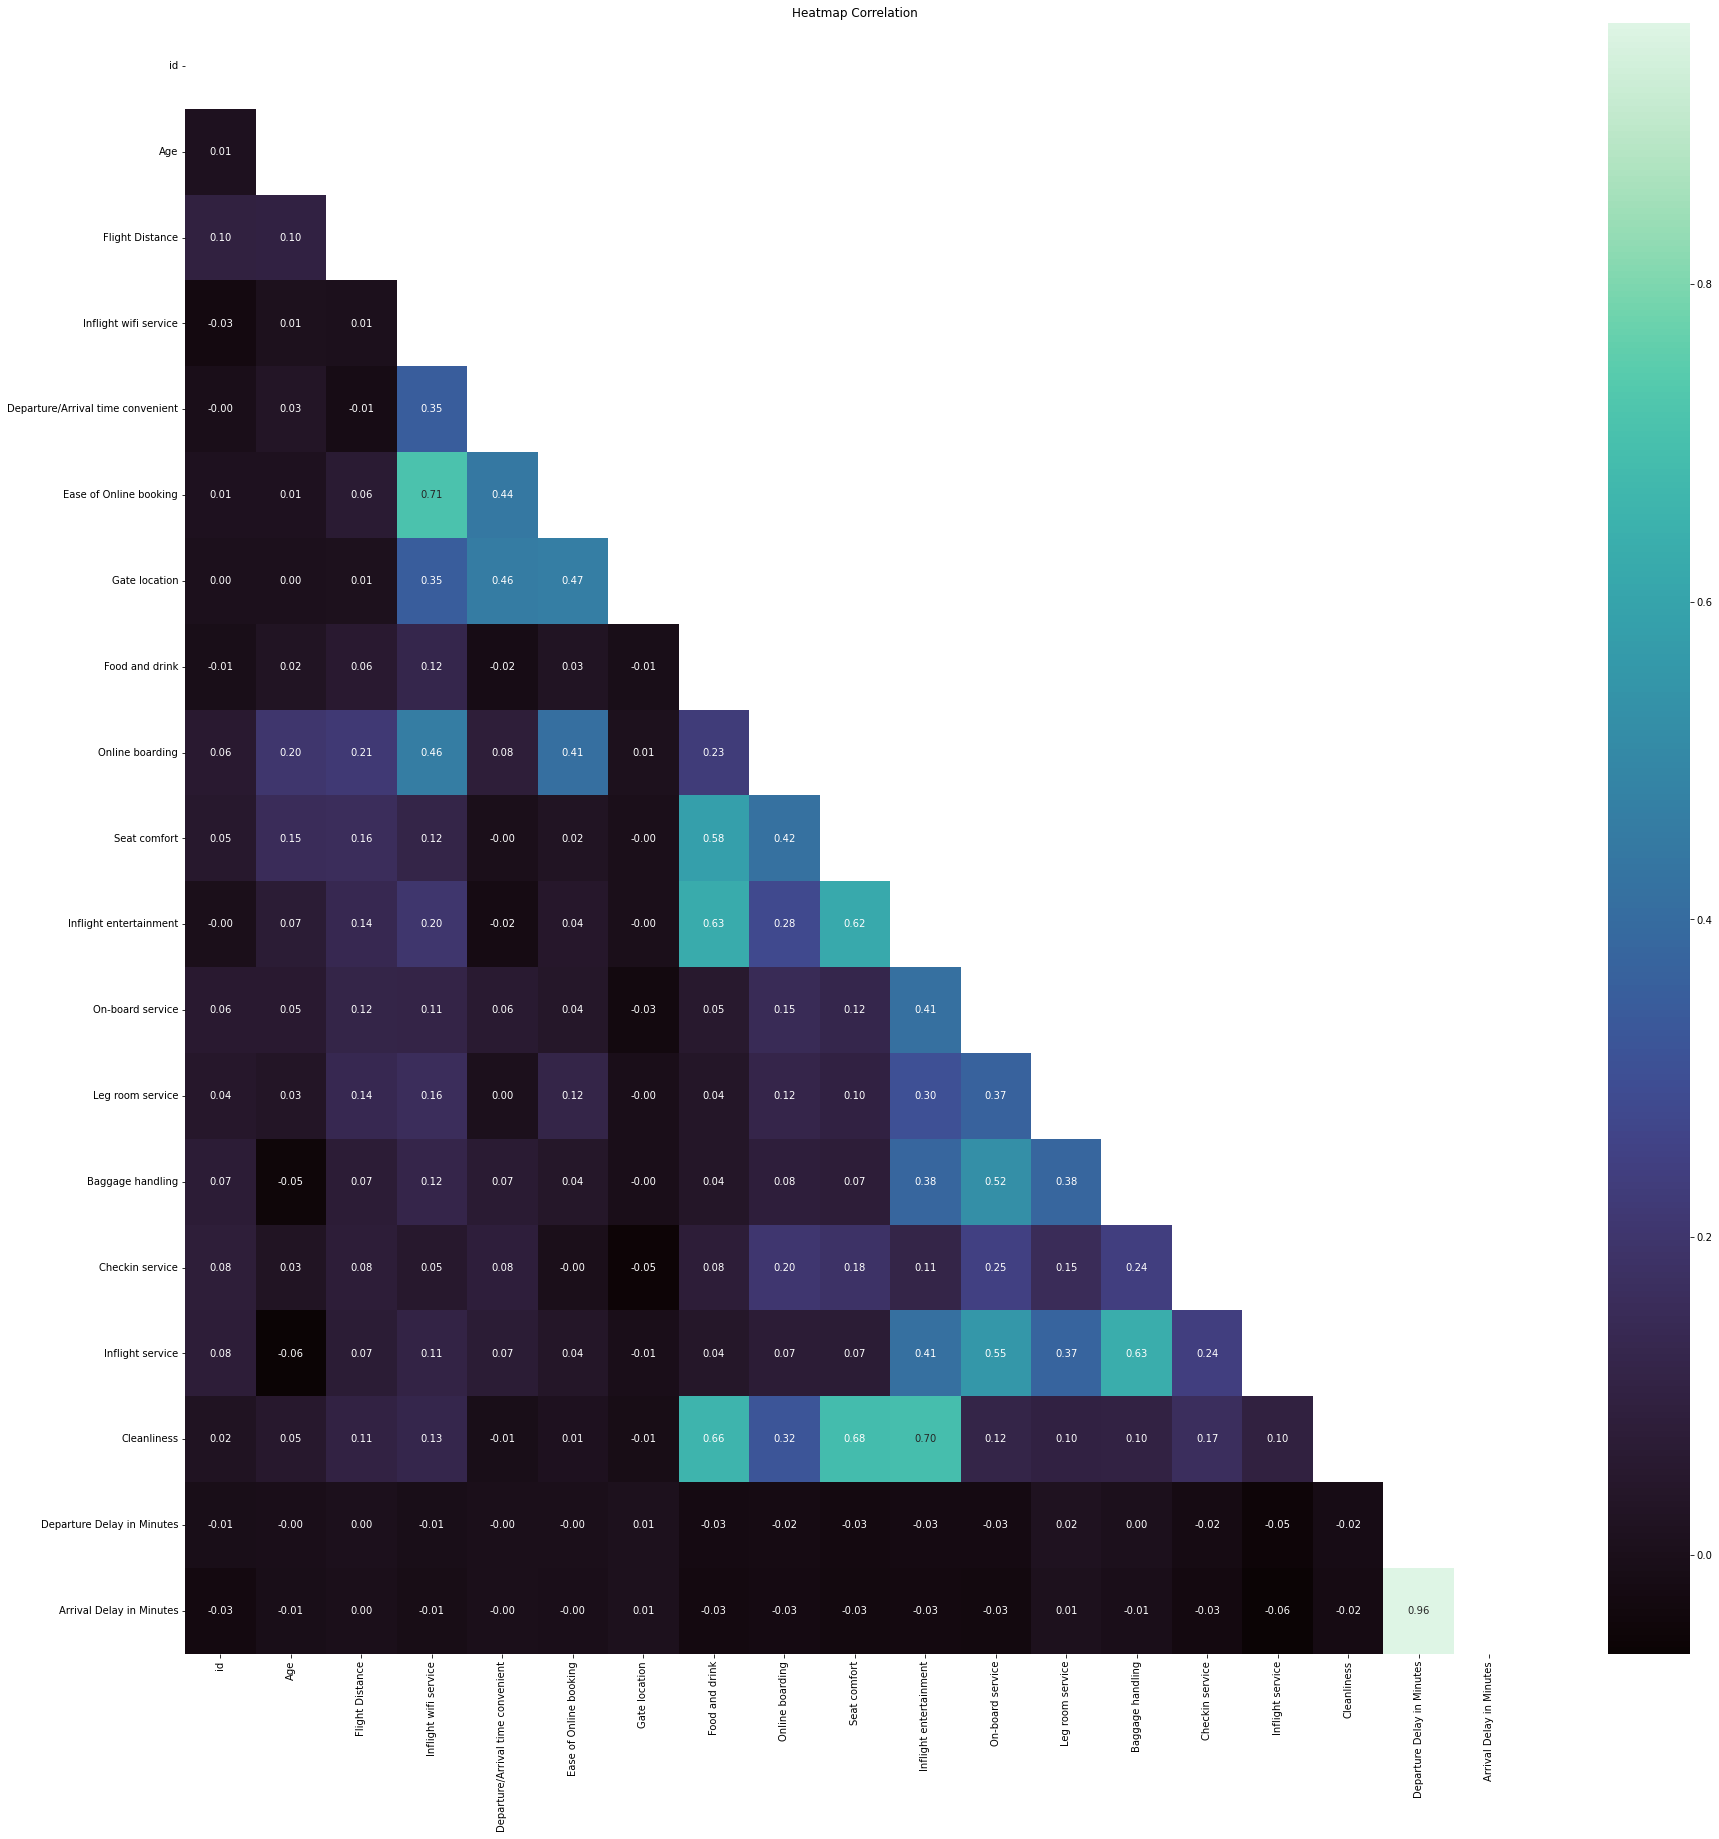

In [44]:
# get correlation using Heatmap
plt.subplots(figsize=(30,30))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask ,annot=True, fmt=".2f", cmap ="mako")
plt.title("Heatmap Correlation")
plt.show()

-dapat dilihat antar column memimili korealasi satu sama lain tetapi terdapat colum yang memiliki korelasi tinggi dan ada juga yang memiliki korelas rendah

In [45]:
# group by satifaction
satisfaction = df.groupby(['satisfaction'])[['satisfaction']].count()
satisfaction

,satisfaction
satisfaction,
neutral or dissatisfied,14573
satisfied,11403


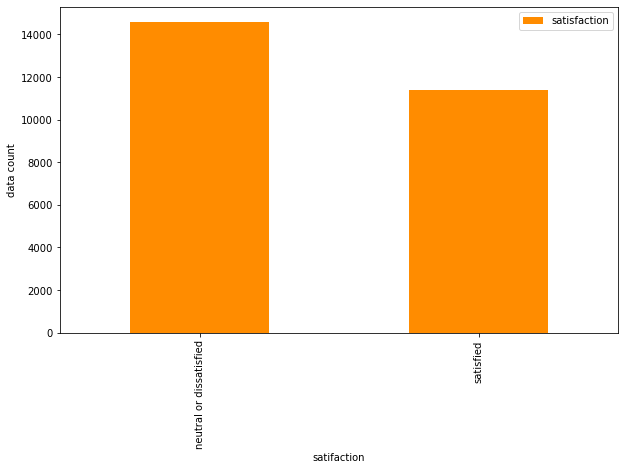

In [46]:
#make histo
satisfaction.plot(kind='bar', figsize=(10,6), color='darkorange')
plt.xlabel('satifaction')
plt.ylabel('data count')

plt.show()

- perbedaan data pada column statisfaction sudah balance karena jarak dari mereka tidak terlalu jauh

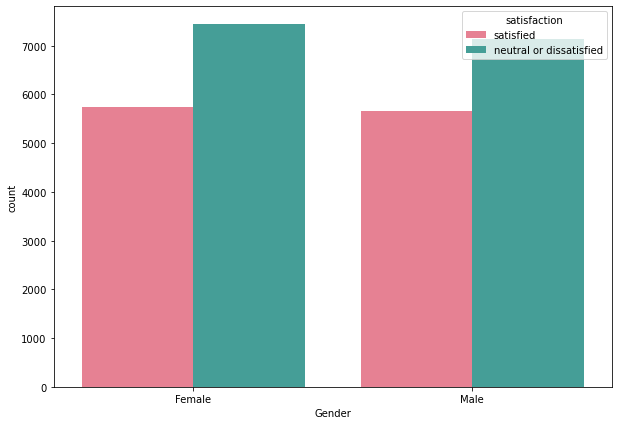

In [47]:
#show hist gender
plt.figure(figsize=(10,7))
sns.countplot('Gender', hue= 'satisfaction', data=df, palette='husl')
plt.show()

- Dari grafik hist tidak terlalu berbeda jauh antara male dan female oleh karena itu disimpulkan bahwa column sex tidak memilki korelasi dengan target dan niali korelasinya juga sangat keci

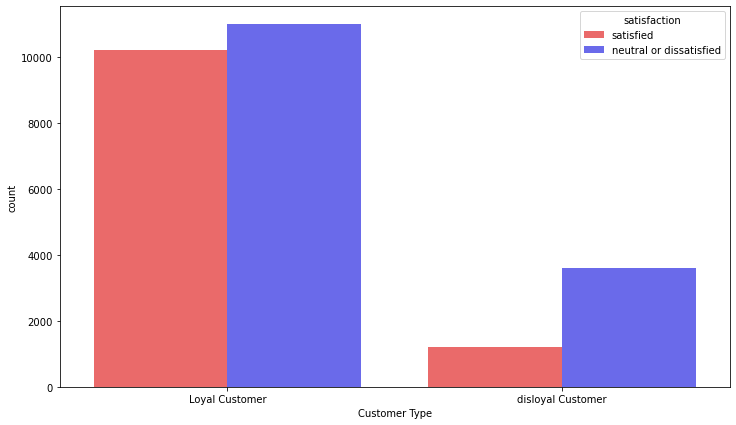

In [49]:
# show his type customer
plt.figure(figsize=(12,7))
sns.countplot('Customer Type', hue= 'satisfaction', data=df, palette='seismic_r')

plt.show()

- Dari grafik dapat dilihat terjad perbedaan signifikan antara loyal dan disloyal customer dimana ini memiliki korelasi dengan target dan terlihat juga bahwa loyal customer yang paling sering merasa tidak puas dengan airline

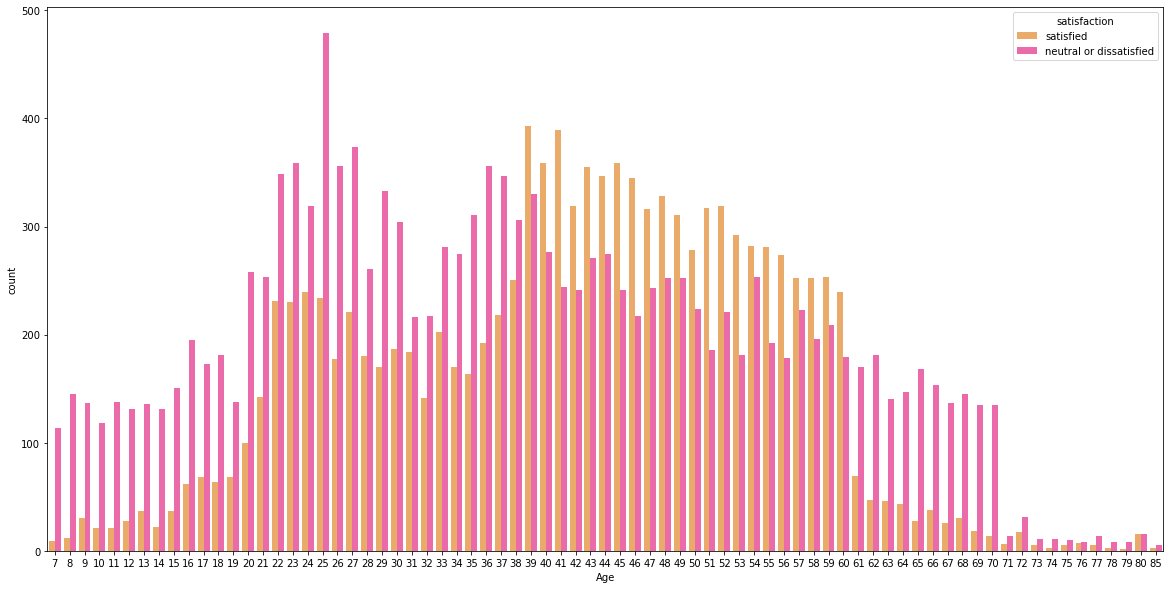

In [52]:
# show his type age
plt.figure(figsize=(20,10))
sns.countplot('Age', hue= 'satisfaction', data=df, palette='spring_r')

plt.show()

- Dari grafik age dapat terlihat bahwa umur memilki korelasi terhadap target dimana umur yang merasa tidak puas di dominasi oleh anak muda umur 21-30 sedangkan yg merasa puas di dominasi oleh umur > 39 

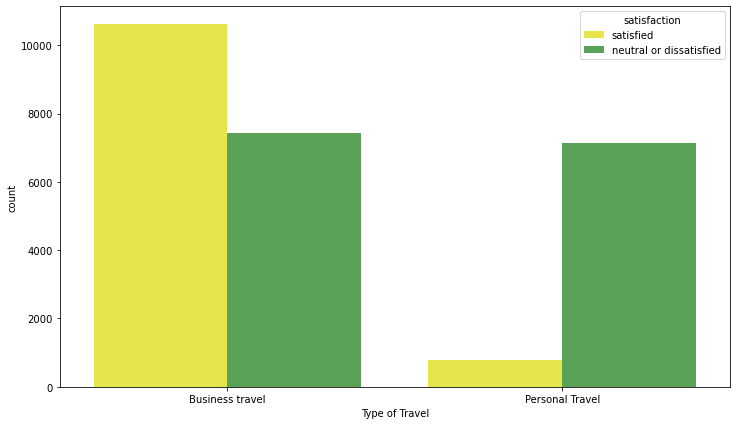

In [71]:
#Type of Travel
plt.figure(figsize=(12,7))
sns.countplot('Type of Travel', hue= 'satisfaction', data=df, palette='Set1_r')

plt.show()

- Dari grafik di atas kebanyakan customer yang tidak puas terhadap performa airline yaitu customer yang mealkukan bussiness travel dan column type travel ini memiliki korelasi terhapap target kita

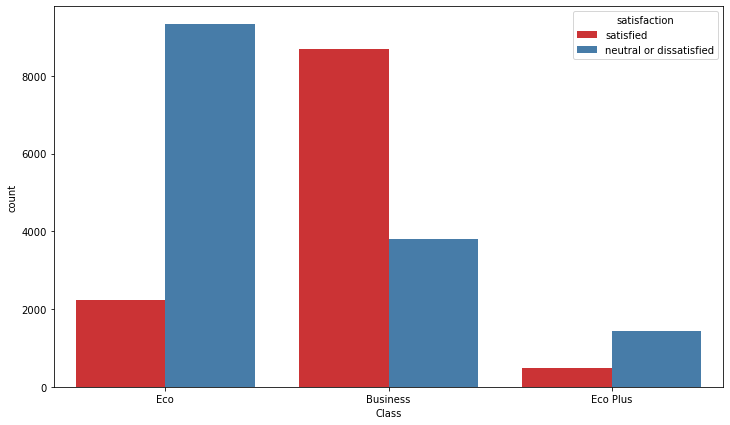

In [69]:
# show his class
plt.figure(figsize=(12,7))
sns.countplot('Class', hue= 'satisfaction', data=df, palette='Set1')

plt.show()

-  Dari grafik di atas kebanyakan customer yang tidak puas terhadap performa airline yaitu customer yang memilih class Business dalam perjalanan mereka dan column type travel ini memiliki korelasi terhapap target kita

In [62]:
# Inflight wifi service
wifi=df[['Inflight wifi service']].groupby(['Inflight wifi service']).size().sort_values(ascending=False).reset_index()
wifi

,Inflight wifi service,0
0,2,6490
1,3,6317
2,4,4981
3,1,4488
4,5,2887
5,0,813


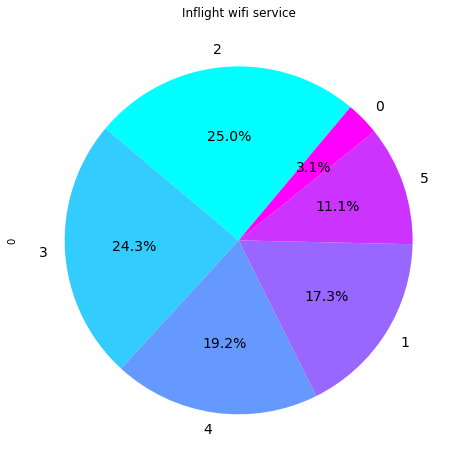

In [72]:
wifi.plot(kind='pie',y=0, autopct='%1.1f%%',  title = "Inflight wifi service",
startangle=50, shadow=False, cmap='cool', labels=wifi['Inflight wifi service'], legend = False, fontsize=14, figsize=(8, 8))

plt.show()

- tingkat kepuasann berada dalam rating 1-5 dan 0 itu customer yang tidak menjawab
- Dari pie chart di atas kebanyakan customer merasa tidak puas dengan service wifi yang di berikan terlihat banyak dari mereka yang memberi rating 2

In [96]:
# pie chart column time convenient
convenient = df.groupby(['Departure/Arrival time convenient'])[['Departure/Arrival time convenient']].count()

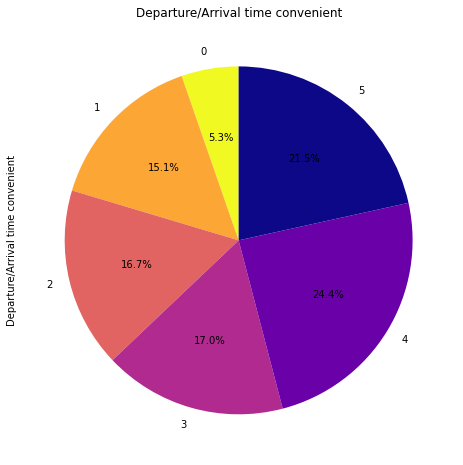

In [101]:
convenient.plot(kind='pie',y=0, autopct='%1.1f%%', startangle=90, shadow=False, legend= False, figsize=(8, 8), cmap='plasma_r')      
plt.title('Departure/Arrival time convenient')

plt.show()

- tingkat kepuasann berada dalam rating 1-5 dan 0 itu customer yang tidak menjawab
- Dari pie chart di atas kebanyakan customer merasa puas dengan kenyaman waktu keberangkatan mau pun waktu tiba dan disimpulkan bahwa column ini memilki pengaruh terhadap target

In [107]:
# pie chart column ease online booking
booking = df.groupby(['Ease of Online booking'])[['Ease of Online booking']].count()

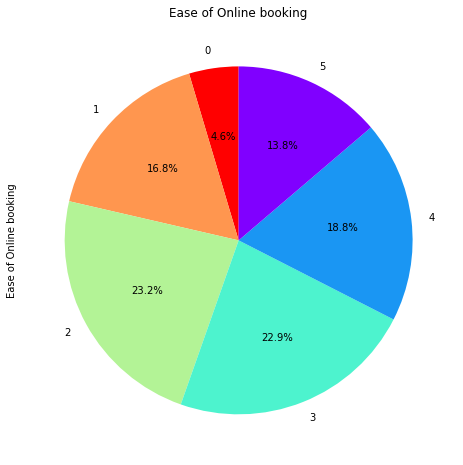

In [105]:
booking.plot(kind='pie',y=0, autopct='%1.1f%%', startangle=90, shadow=False, legend= False, figsize=(8, 8), cmap='rainbow_r')      
plt.title('Ease of Online booking')

plt.show()

- tingkat kepuasann berada dalam rating 1-5 dan 0 itu customer yang tidak menjawab
- Dari pie chart di atas kebanyakan customer merasa tidak puas dengan kemudahan dalam pemesanan tiket online dan disimpulkan bahwa column ini memilki pengaruh terhadap target

In [137]:
# pie chart column
gate = df.groupby(['Gate location'])[['Gate location']].count()
food = df.groupby(['Food and drink'])[['Food and drink']].count()
boarding = df.groupby(['Online boarding'])[['Online boarding']].count()
clean = df.groupby(['Cleanliness'])[['Cleanliness']].count()

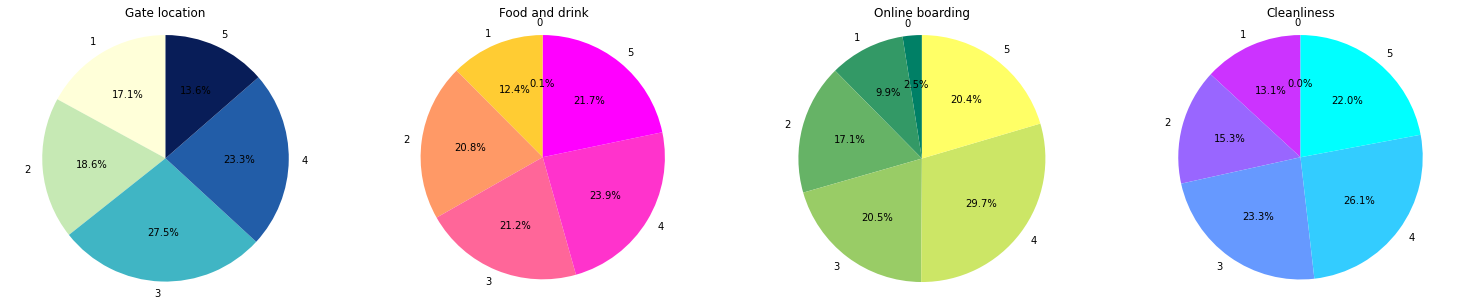

In [138]:
plt.figure(figsize=(26, 5))

plt.subplot(1,4,1)
gate.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='YlGnBu')      
plt.title('Gate location')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,2)
food.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='spring_r')      
plt.title('Food and drink')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,3)
boarding.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='summer')      
plt.title('Online boarding')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,4)
clean.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='cool_r')      
plt.title('Cleanliness')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


- tingkat kepuasann berada dalam rating 1-5 dan 0 itu customer yang tidak menjawab
- Dari pie chart di atas kebanyakan customer cukup puas dengan lokasi gate sebelum kebrangkatan mau pun waktu tiba dan disimpulkan bahwa column ini memilki pengaruh terhadap target
- Dari pie chart di atas kebanyakan customer cukup puas dengan servis makanan dan minuman yang diberikan airline dan disimpulkan bahwa column ini memilki pengaruh terhadap target
- Dari pie chart di atas kebanyakan customer cukup puas dengan online boarding dan disimpulkan bahwa column ini memilki pengaruh terhadap target
- Dari pie chart di atas kebanyakan customer cukup puas dengan tingkat keberssihan dan disimpulkan bahwa column ini memilki pengaruh terhadap target

In [131]:
# pie chart column
seat = df.groupby(['Seat comfort'])[['Seat comfort']].count()
entertaiment = df.groupby(['Inflight entertainment'])[['Inflight entertainment']].count()
on_board = df.groupby(['On-board service'])[['On-board service']].count()

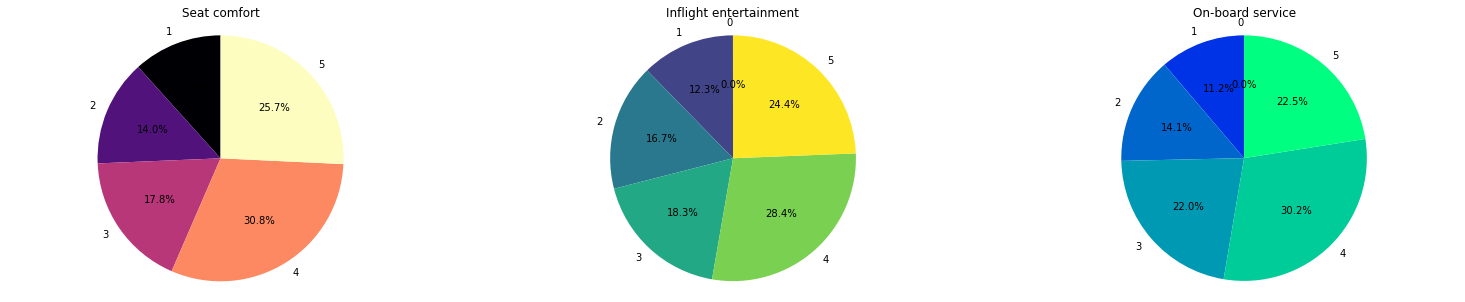

In [132]:
plt.figure(figsize=(26, 5))

plt.subplot(1,3,1)
seat.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='magma')      
plt.title('Seat comfort')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,3,2)
entertaiment.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='viridis')      
plt.title('Inflight entertainment')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,3,3)
on_board.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='winter')      
plt.title('On-board service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

- tingkat kepuasann berada dalam rating 1-5 dan 0 itu customer yang tidak menjawab
- Dari pie chart di atas kebanyakan customer  puas dengan kenyamanan kursi s dan disimpulkan bahwa column ini memilki pengaruh terhadap target
- Dari pie chart di atas kebanyakan customer puas dengan inflight entertaiment diberikan airline dan disimpulkan bahwa column ini memilki pengaruh terhadap target
- Dari pie chart di atas kebanyakan customer puas dengan On-board service dan disimpulkan bahwa column ini memilki pengaruh terhadap target

In [133]:
# pie chart column
leg = df.groupby(['Leg room service'])[['Leg room service']].count()
bagage = df.groupby(['Baggage handling'])[['Baggage handling']].count()
checkin = df.groupby(['Checkin service'])[['Checkin service']].count()
inflight = df.groupby(['Inflight service'])[['Inflight service']].count()

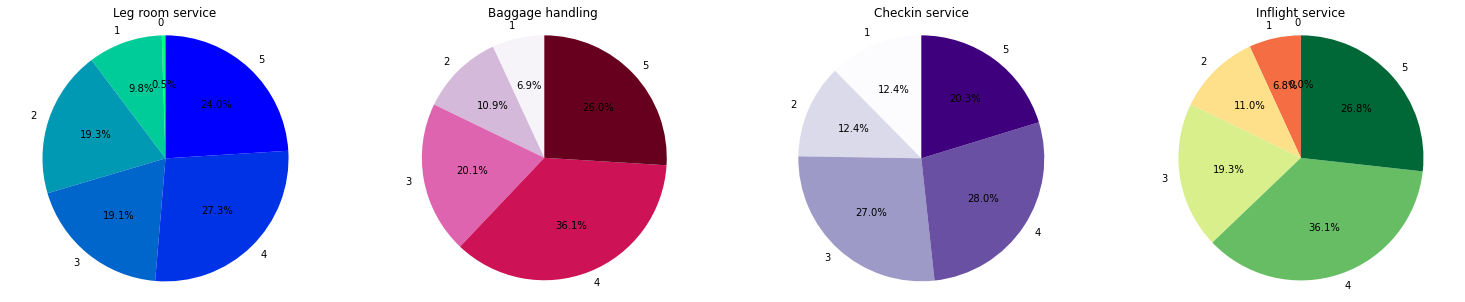

In [135]:
plt.figure(figsize=(26, 5))

plt.subplot(1,4,1)
leg.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='winter_r')      
plt.title('Leg room service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,2)
bagage.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='PuRd')      
plt.title('Baggage handling')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,3)
checkin.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='Purples')      
plt.title('Checkin service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,4)
inflight.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='RdYlGn')      
plt.title('Inflight service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.show()

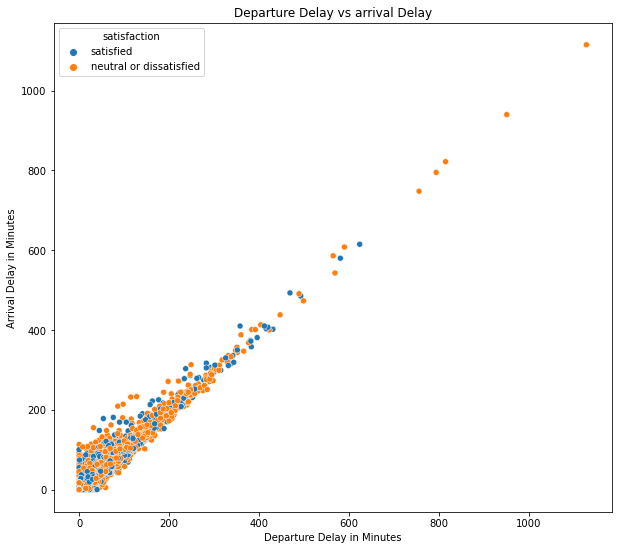

In [142]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue = 'satisfaction', data=df)
plt.title('Departure Delay vs arrival Delay')
plt.show()

- dapat dilihat semakin banyak waktu delay saat kebernagkatan maka semakin banyak pula waktu delay saat tiba

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [143]:
#get data for model inference
data_inf = df.sample(21, random_state=21)
data_inf

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
10764,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,5,4,5,3,1,3,5,3,8.0,neutral or dissatisfied
8489,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,3,2,3,3,4,3,163,222.0,satisfied
5128,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,2,3,2,2,1,0,0.0,neutral or dissatisfied
20203,107959,Male,Loyal Customer,53,Business travel,Business,825,3,3,3,...,4,4,4,4,3,4,4,0,0.0,satisfied
371,119844,Male,Loyal Customer,53,Business travel,Eco,1095,3,5,5,...,3,1,1,3,3,4,3,0,0.0,neutral or dissatisfied
14745,116336,Female,Loyal Customer,44,Personal Travel,Eco,417,2,5,2,...,2,2,2,2,2,2,3,0,0.0,neutral or dissatisfied
2803,22058,Male,Loyal Customer,30,Business travel,Business,1819,3,3,5,...,4,3,4,1,4,2,4,0,0.0,satisfied
462,111483,Male,disloyal Customer,43,Business travel,Eco,1052,3,4,4,...,4,3,3,2,3,1,4,0,0.0,neutral or dissatisfied
18110,6490,Male,Loyal Customer,34,Personal Travel,Eco,557,3,3,3,...,3,3,2,4,3,3,3,0,0.0,neutral or dissatisfied
10334,19136,Female,disloyal Customer,58,Business travel,Eco Plus,265,2,3,3,...,3,4,5,2,4,3,3,0,3.0,neutral or dissatisfied


In [145]:
# remove inference set from data set
data_train_test = df.drop(data_inf.index)

In [146]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,5,4,5,3,1,3,5,3,8.0,neutral or dissatisfied
1,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,3,2,3,3,4,3,163,222.0,satisfied
2,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,2,3,2,2,1,0,0.0,neutral or dissatisfied
3,107959,Male,Loyal Customer,53,Business travel,Business,825,3,3,3,...,4,4,4,4,3,4,4,0,0.0,satisfied
4,119844,Male,Loyal Customer,53,Business travel,Eco,1095,3,5,5,...,3,1,1,3,3,4,3,0,0.0,neutral or dissatisfied
5,116336,Female,Loyal Customer,44,Personal Travel,Eco,417,2,5,2,...,2,2,2,2,2,2,3,0,0.0,neutral or dissatisfied
6,22058,Male,Loyal Customer,30,Business travel,Business,1819,3,3,5,...,4,3,4,1,4,2,4,0,0.0,satisfied
7,111483,Male,disloyal Customer,43,Business travel,Eco,1052,3,4,4,...,4,3,3,2,3,1,4,0,0.0,neutral or dissatisfied
8,6490,Male,Loyal Customer,34,Personal Travel,Eco,557,3,3,3,...,3,3,2,4,3,3,3,0,0.0,neutral or dissatisfied
9,19136,Female,disloyal Customer,58,Business travel,Eco Plus,265,2,3,3,...,3,4,5,2,4,3,3,0,3.0,neutral or dissatisfied


## Splitting between `X` (Features) and `y` (Target)

In [147]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('satisfaction', axis=1)
y = data_train_test['satisfaction']
X

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25950,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,4,3,2,4,4,5,4,0,0.0
25951,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25952,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,2,4,3,4,5,4,2,0,0.0
25953,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


### split data 80% dan 20%

In [149]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=21)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (20764, 23)
Test Size :  (5191, 23)


## Handling outliers

kita akan melakukan handling outliers pada X_Train

In [150]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=25)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', X_train[variable].skew())
    if (X_train[variable].skew() >= -0.5 ) | (X_train[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

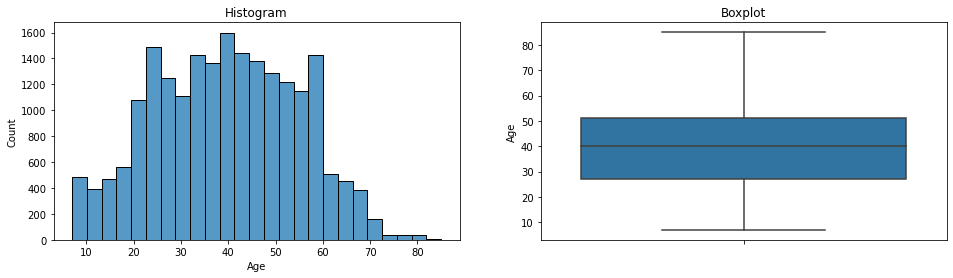

skewness: 0.0078400330584975
the distribution is skewed


In [152]:
# mengecek outliers pada column age
diagnostic_plots(X_train, 'Age')

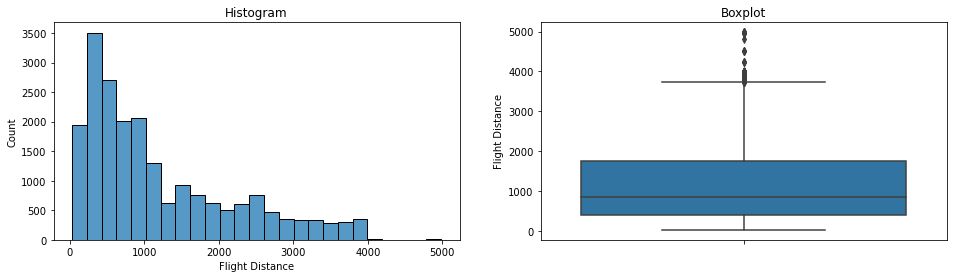

skewness: 1.1032345448965566
the distribution is skewed


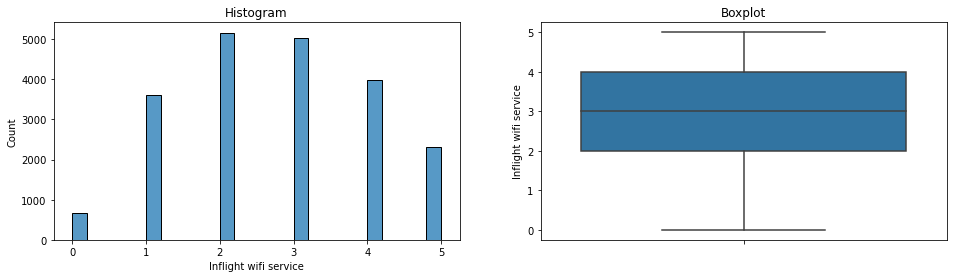

skewness: 0.039718901787881636
the distribution is skewed


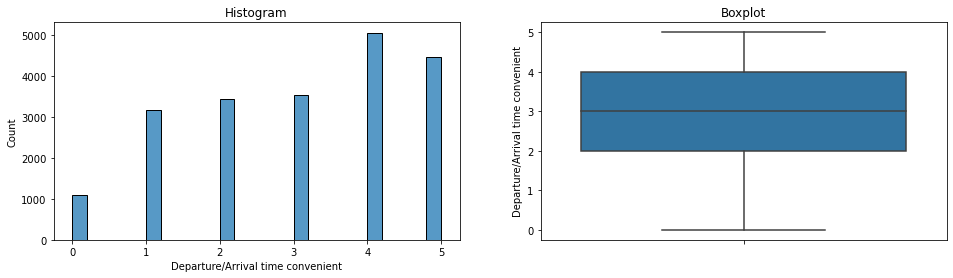

skewness: -0.3215865741029826
the distribution is skewed


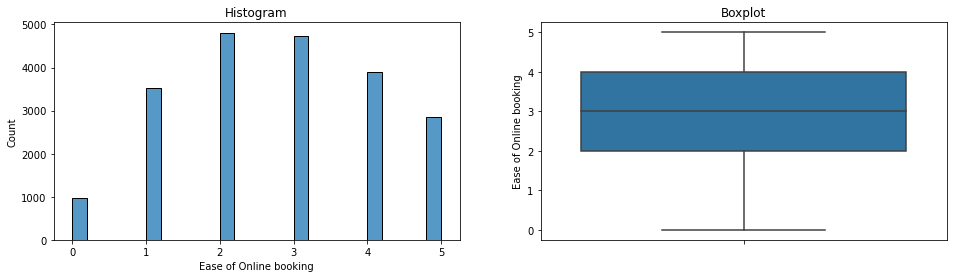

skewness: -0.018097403968240236
the distribution is skewed


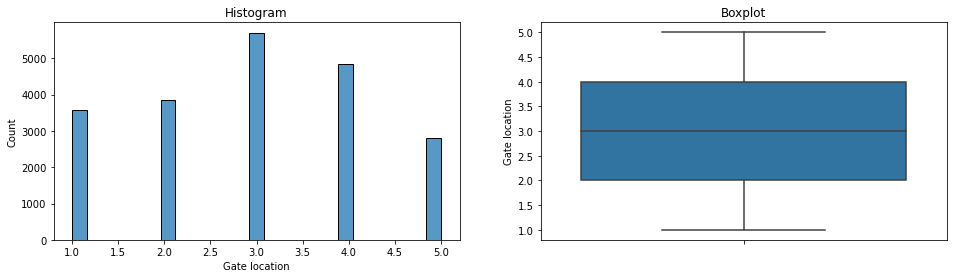

skewness: -0.05585605781461585
the distribution is skewed


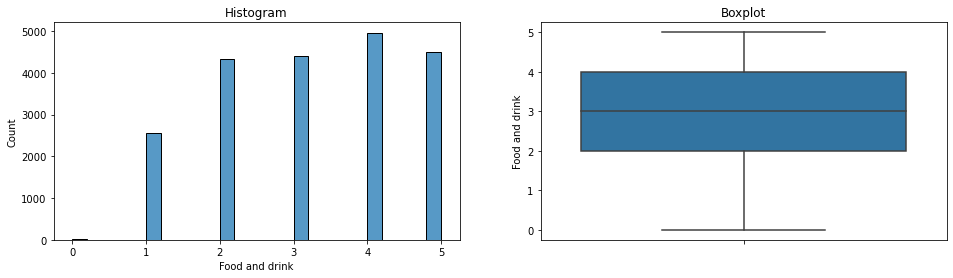

skewness: -0.1674129679468564
the distribution is skewed


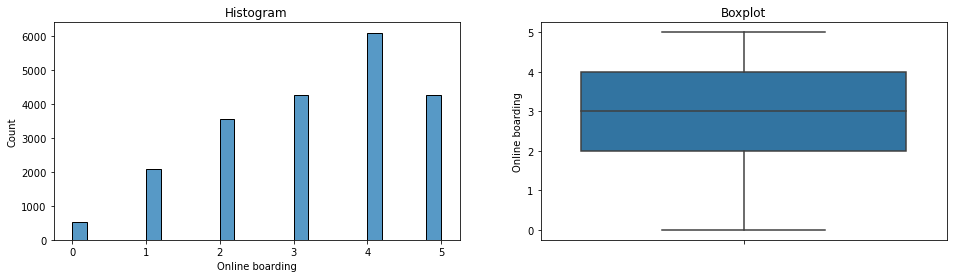

skewness: -0.4641406813354058
the distribution is skewed


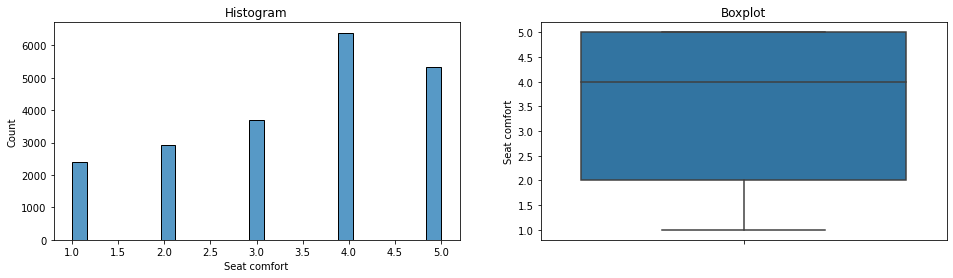

skewness: -0.4963941059098623
the distribution is skewed


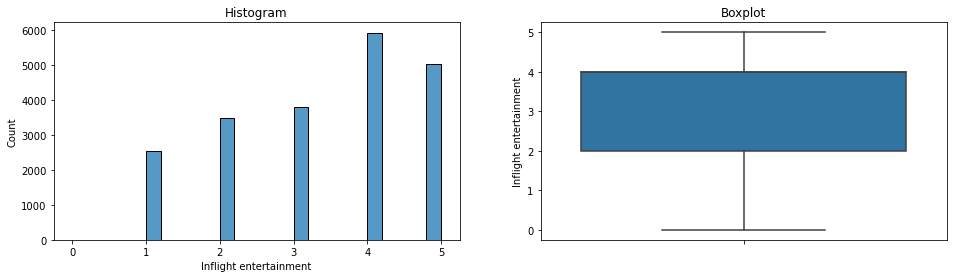

skewness: -0.37245927061050393
the distribution is skewed


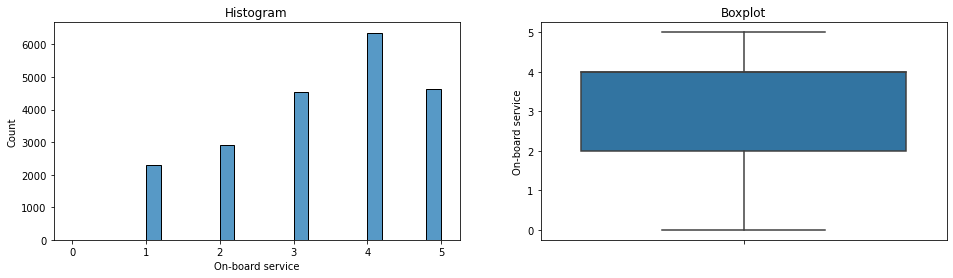

skewness: -0.43404480174256876
the distribution is skewed


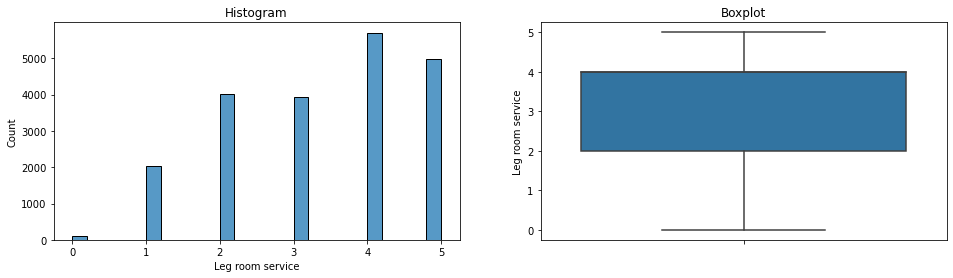

skewness: -0.3421421605607186
the distribution is skewed


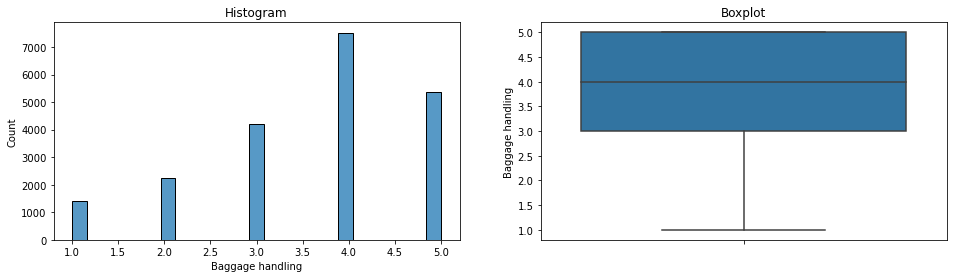

skewness: -0.6800085901762607
the distribution is skewed


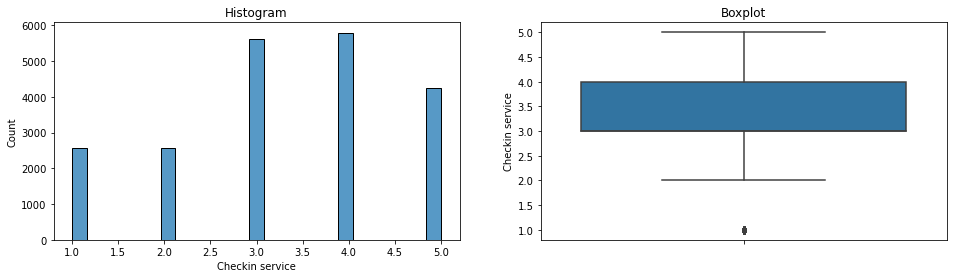

skewness: -0.3734142683610946
the distribution is skewed


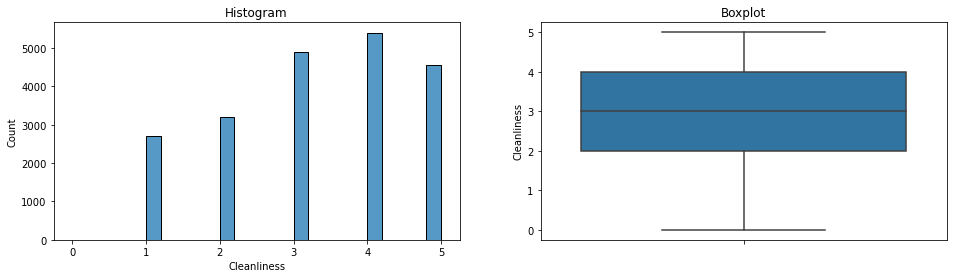

skewness: -0.3001267870300201
the distribution is skewed


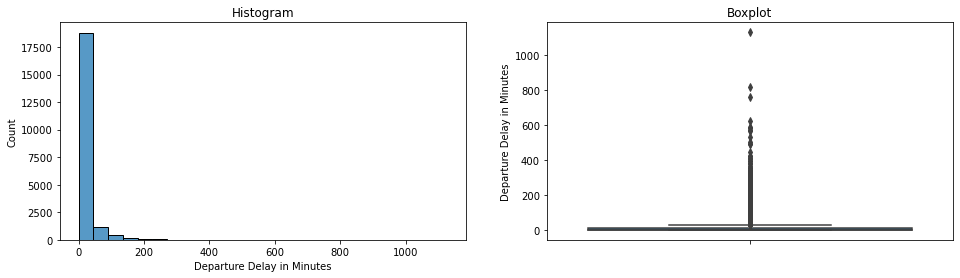

skewness: 6.900306192100132
the distribution is skewed


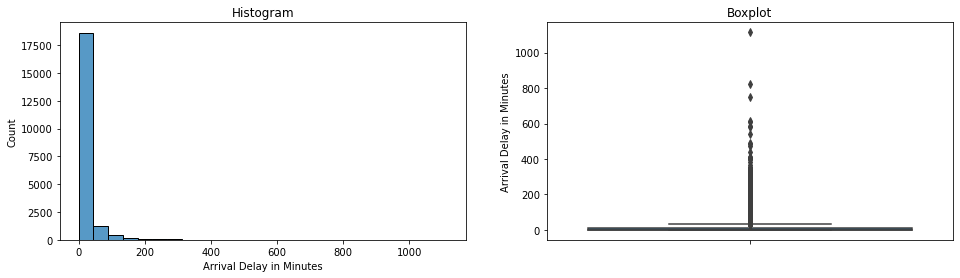

skewness: 6.685988055764313
the distribution is skewed


In [160]:
# mengecek outlier pada column laiinya
diagnostic_plots(X_train, 'Flight Distance')
diagnostic_plots(X_train, 'Inflight wifi service')
diagnostic_plots(X_train, 'Departure/Arrival time convenient')
diagnostic_plots(X_train, 'Ease of Online booking')
diagnostic_plots(X_train, 'Gate location')
diagnostic_plots(X_train, 'Food and drink')
diagnostic_plots(X_train, 'Online boarding')
diagnostic_plots(X_train, 'Seat comfort')
diagnostic_plots(X_train, 'Inflight entertainment')
diagnostic_plots(X_train, 'On-board service')
diagnostic_plots(X_train, 'Leg room service')
diagnostic_plots(X_train, 'Baggage handling')
diagnostic_plots(X_train, 'Checkin service')
diagnostic_plots(X_train, 'Cleanliness')
diagnostic_plots(X_train, 'Departure Delay in Minutes')
diagnostic_plots(X_train, 'Arrival Delay in Minutes')

- terdapat outlier pada column age, flight distance, departure delay dan arrival delay dianggap sebagai natural ouliers karena jarak waktu dan umur itu tidak bisa dianggap outliers

- terdapat beberapa colum yang memiliki distribusi normal yaitu age,inflight service,departure time covenient,ease of online booking,gate location,food and drink,online boarding, seat comfort, inflight entertaiment,on board service,leg room service,checkin service,cleanliness

- terdapat juga memilki column skew yaitu flight distance, departure delay dan arrival delay

## Handling missing Value

karena terdapat missing value pada column arrival delay in minutes maka akan dilakukan handling pada missing tersebut pada train dan test 

In [162]:
# pada x_train
X_train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             68
dtype: int64

In [163]:
#handle miissing value karna data nya skew
median = X_train['Arrival Delay in Minutes'].median()
X_train['Arrival Delay in Minutes'].fillna(median, inplace=True)

In [165]:
#missing value xtest
X_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             15
dtype: int64

In [166]:
#handle miissing value karna data nya skew
median = X_test['Arrival Delay in Minutes'].median()
X_test['Arrival Delay in Minutes'].fillna(median, inplace=True)

In [168]:
y_train.isnull().sum()

0

In [170]:
y_test.isnull().sum()

0

## Feature selection

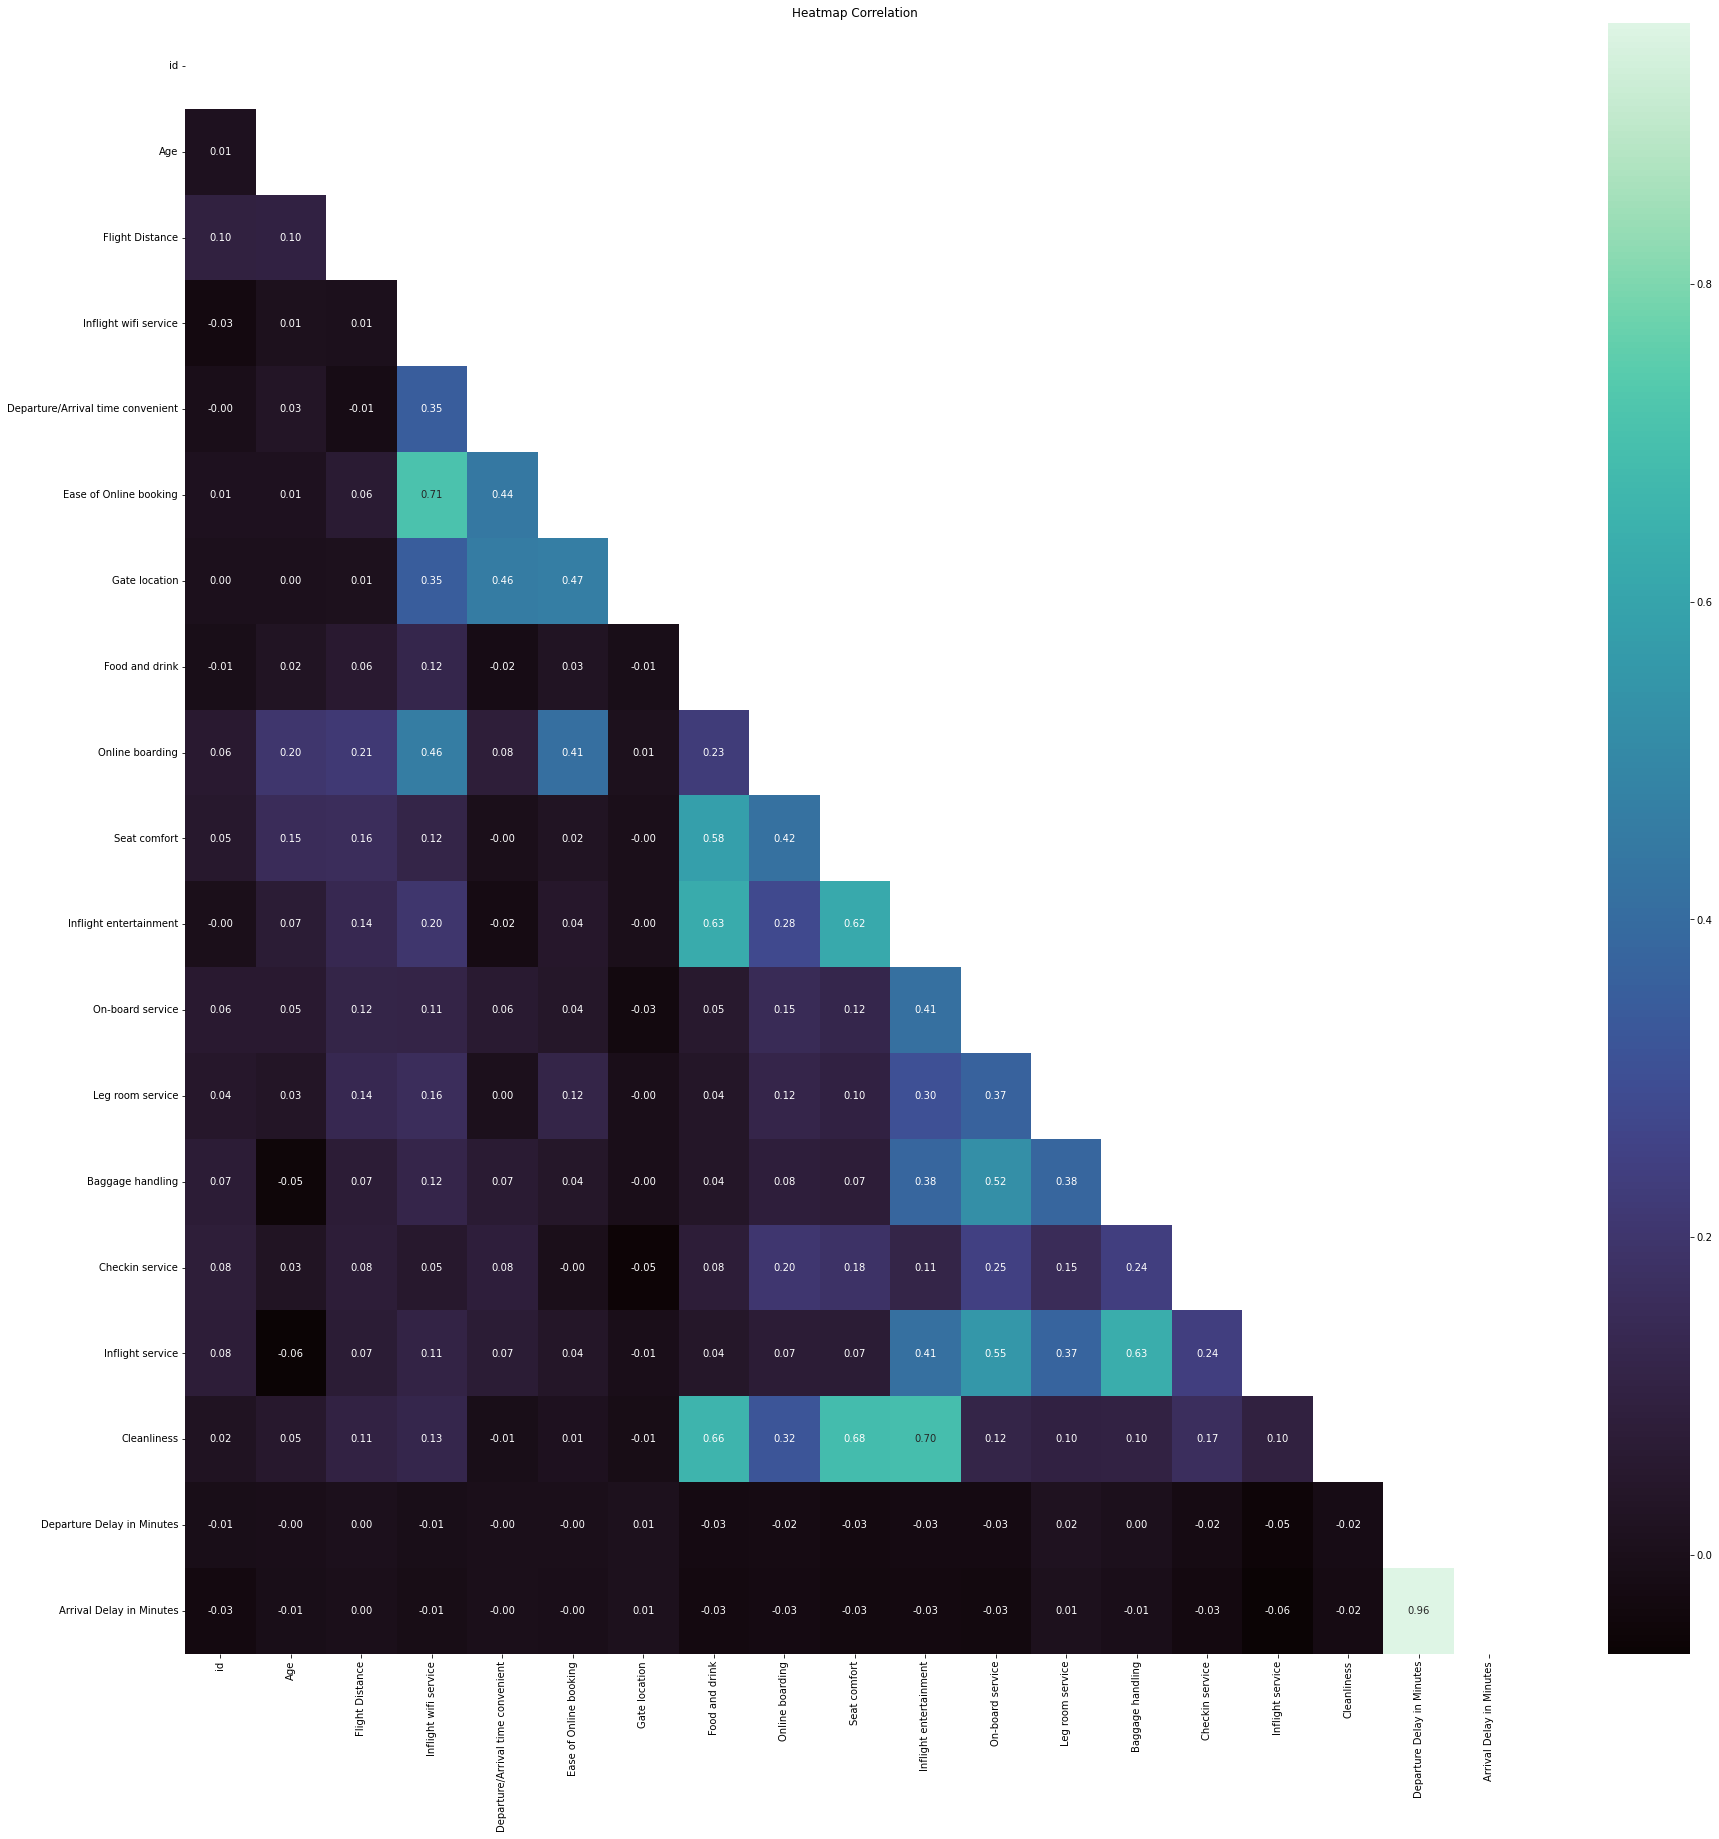

In [174]:
# get correlation using Heatmap
plt.subplots(figsize=(30,30))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask ,annot=True, fmt=".2f", cmap ="mako")
plt.title("Heatmap Correlation")
plt.show()

Dari heatmap yang ada pada EDA dapat terlihat banyak kolom yang mempunyai korelasi dengan 'satisfaction', namun beberapa kolom memiliki korelasi yang rendah. Beberapa kolom itu adalah sex(gender),user id, departure/arrival time conventient Dari segi EDA juga kedua kolom ini tidak didukung memiliki korelasi bagi 'satisfaction'.

In [194]:
#future importan
cat = ['Gender', 'Customer Type', 'Type of Travel','Class']
X_train1= pd.get_dummies(X_train, columns=cat, drop_first=True)
X_train1

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
3829,128475,10,647,2,2,2,3,2,2,2,...,2,3,2,10,2.0,0,0,1,1,0
7591,64827,30,551,2,2,3,3,2,2,2,...,3,3,2,24,11.0,0,0,0,0,0
20387,3535,55,557,3,4,2,4,3,4,3,...,4,1,4,0,0.0,0,0,1,1,0
21507,87445,25,373,5,0,5,4,2,0,4,...,4,5,2,0,2.0,1,1,0,0,0
4604,108826,49,2201,5,5,5,5,3,4,4,...,3,4,5,11,13.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,47377,48,2304,1,5,5,5,5,3,2,...,1,1,2,17,8.0,1,0,0,0,0
8964,91548,38,280,3,3,3,3,4,3,4,...,2,3,4,0,17.0,1,1,0,0,0
5944,15508,35,164,1,5,1,1,3,1,4,...,5,5,3,3,0.0,0,0,1,1,0
5327,62280,53,1624,5,5,5,5,4,4,5,...,5,5,3,55,45.0,1,0,0,0,0


In [195]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 21, random_state=69)

#fit to the data
featimpt.fit(X_train1,y_train)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train1.columns)
scorepercolumn.sort_values(ascending=False)

Inflight wifi service                0.142333
Online boarding                      0.138797
Type of Travel_Personal Travel       0.101251
Class_Eco                            0.065394
Leg room service                     0.051497
Inflight entertainment               0.049962
Seat comfort                         0.044297
Customer Type_disloyal Customer      0.038069
On-board service                     0.035502
Flight Distance                      0.034199
Ease of Online booking               0.033759
Age                                  0.032227
Cleanliness                          0.031721
Checkin service                      0.030262
id                                   0.030172
Departure/Arrival time convenient    0.027855
Baggage handling                     0.026610
Inflight service                     0.021060
Gate location                        0.016851
Food and drink                       0.014376
Arrival Delay in Minutes             0.012929
Departure Delay in Minutes        

- Dapat dilihat bahwa di column importance bahwa column Departure/Arrival time convenient memiliki nilai yang cukup untuk masuk ke feature maka di putuskan hanya column gender dan user id yg akan di drop

In [197]:
# Drop Column user id dan gender

X_train.drop(['Gender', 'id'], axis=1, inplace=True)
X_test.drop(['Gender', 'id'], axis=1, inplace=True)

In [198]:
X_train

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
3829,Loyal Customer,10,Personal Travel,Eco,647,2,2,2,3,2,...,2,2,4,5,3,2,3,2,10,2.0
7591,Loyal Customer,30,Business travel,Business,551,2,2,3,3,2,...,2,2,1,1,3,3,3,2,24,11.0
20387,Loyal Customer,55,Personal Travel,Eco,557,3,4,2,4,3,...,3,1,1,2,1,4,1,4,0,0.0
21507,disloyal Customer,25,Business travel,Business,373,5,0,5,4,2,...,4,2,3,5,5,4,5,2,0,2.0
4604,Loyal Customer,49,Business travel,Business,2201,5,5,5,5,3,...,4,4,4,4,4,3,4,5,11,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Loyal Customer,48,Business travel,Business,2304,1,5,5,5,5,...,2,1,1,1,1,1,1,2,17,8.0
8964,disloyal Customer,38,Business travel,Business,280,3,3,3,3,4,...,4,4,1,2,3,2,3,4,0,17.0
5944,Loyal Customer,35,Personal Travel,Eco,164,1,5,1,1,3,...,4,3,5,3,5,5,5,3,3,0.0
5327,Loyal Customer,53,Business travel,Business,1624,5,5,5,5,4,...,5,5,5,5,5,5,5,3,55,45.0


## Split between Numerical Columns and Categorical Columns

In [201]:
num_columns =['Flight Distance', 'Age'] 
cat_columns =['Customer Type', 'Type of Travel','Class',  'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking','Gate location','Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']

In [264]:
# spli train set dan test set base on column
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_test_cat

,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
10625,disloyal Customer,Business travel,Business,2,2,2,2,1,2,1,1,5,5,4,4,5,1
19269,disloyal Customer,Business travel,Eco,1,0,0,2,2,0,3,2,5,5,5,3,2,2
23218,Loyal Customer,Personal Travel,Eco,1,1,1,3,1,1,1,1,1,1,3,4,3,1
8064,Loyal Customer,Personal Travel,Business,4,1,1,3,2,1,5,2,2,3,3,4,3,2
21081,Loyal Customer,Business travel,Business,3,3,3,3,5,5,5,5,2,4,4,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25902,Loyal Customer,Personal Travel,Business,3,4,3,4,4,3,4,4,5,4,5,4,5,4
12351,Loyal Customer,Personal Travel,Eco,4,4,4,3,4,4,4,4,4,3,3,4,4,4
13021,Loyal Customer,Business travel,Business,1,1,5,1,2,4,4,4,4,4,4,3,4,3
5049,Loyal Customer,Business travel,Business,2,2,4,2,3,4,4,5,5,5,5,4,5,3


## Feature Scaling

Scaling akan dilakukan dengan menggunakan pipeline bersama encoding, menggunakan minmaxscaler dan standar scaler

## Feature Encoding

Encoding akan dilakukan dengan menggunakan pipeline bersama scaling, menggunakan ordinalencoder

##  Encoding Y target

dikarenakan bentukd dari target kita kategorical maka perlu dilakuakan encoding menggunakan Label Encoder

In [208]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [209]:
#classes dari label encoder
labelencoder.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [210]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)

In [228]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['satisfaction'])
y_test_enc = pd.DataFrame(y_test_encoded, columns=['satisfaction'])

In [231]:
y_test_enc

,satisfaction
0,1
1,0
2,0
3,1
4,1
...,...
5186,0
5187,0
5188,1
5189,1


kita telah mekukan label encoder dimana
- 0 = neutral or dissatisfied
- 1 = satisfied

In [239]:
#Satukan kedua dataset train dan test dari num dan category
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)
X_train_final

,Flight Distance,Age,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
3829,647,10,Loyal Customer,Personal Travel,Eco,2,2,2,3,2,2,2,2,4,5,3,2,3,2
7591,551,30,Loyal Customer,Business travel,Business,2,2,3,3,2,2,2,2,1,1,3,3,3,2
20387,557,55,Loyal Customer,Personal Travel,Eco,3,4,2,4,3,4,3,1,1,2,1,4,1,4
21507,373,25,disloyal Customer,Business travel,Business,5,0,5,4,2,0,4,2,3,5,5,4,5,2
4604,2201,49,Loyal Customer,Business travel,Business,5,5,5,5,3,4,4,4,4,4,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,2304,48,Loyal Customer,Business travel,Business,1,5,5,5,5,3,2,1,1,1,1,1,1,2
8964,280,38,disloyal Customer,Business travel,Business,3,3,3,3,4,3,4,4,1,2,3,2,3,4
5944,164,35,Loyal Customer,Personal Travel,Eco,1,5,1,1,3,1,4,3,5,3,5,5,5,3
5327,1624,53,Loyal Customer,Business travel,Business,5,5,5,5,4,4,5,5,5,5,5,5,5,3


# 6. Model definition

Notes :

- Algoritma yang akan dipakai adalah:
- a. Logistic Regression
- b. SVM
- c. Decision Tree
- d. Random Forest

In [265]:
#divide num by skew and normal, cat by ordinal and none
num_skew = ['Flight Distance']
num_normal = ['Age']
cat_ord = ['Customer Type','Type of Travel','Class']
cat_none = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking','Gate location','Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']

In [266]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skew),
    ('numnormal', StandardScaler(),num_normal),
    ('catord', OrdinalEncoder(),cat_ord),
    ('catnone', 'passthrough',cat_none)
])

In [267]:
#persiapkan pipeline LogisticRegression
premod_logreg = Pipeline([
    ('preprop', preprocess),
    ('LogReg', LogisticRegression())
    ])

In [268]:
#persiapkan pipeline SVM
premod_SVC = Pipeline([
    ('preprop', preprocess),
    ('SVC', SVC())
])

In [269]:
#persiapkan deciison treee
premod_DT = Pipeline([
    ('preprop', preprocess),
    ('DT', DecisionTreeClassifier())
])

In [270]:
# random forest
premod_RF = Pipeline([
    ('preprop', preprocess),
    ('RF', RandomForestClassifier())
])

# 7. Model Training

model training dilakukan dengan gridsearch di evalution

# 8 - Model Evalution

In [370]:
#buat dataframe untuk menampung hasil 
hasil = pd.DataFrame(('LR','SVC','DT','RF'))
hasil.rename(columns ={0:'model'},inplace=True)
hasil['mean']=[0,0,0,0]
hasil['std']=[0,0,0,0]

In [371]:
# MODEL LOGISTIC REGREESION

model = premod_logreg
index =0
a = np.mean(cross_val_score(model,X_train_final,y_train_enc,cv=5))
b = np.std(cross_val_score(model,X_train_final,y_train_enc,cv=5))

hasil.loc[index, 'mean'] = a
hasil.loc[index, 'std'] = b

In [372]:
# MODEL SVM

model = premod_SVC
index =1
a1 = np.mean(cross_val_score(model,X_train_final,y_train_enc,cv=5))
b1 = np.std(cross_val_score(model,X_train_final,y_train_enc,cv=5))

hasil.loc[index, 'mean'] = a1
hasil.loc[index, 'std'] = b1

In [373]:
# model DecisionTree

model = premod_DT
index =2

a2 = np.mean(cross_val_score(model,X_train_final, y_train_enc,cv=5))
b2 = np.std(cross_val_score(model,X_train_final, y_train_enc,cv=5))

hasil.loc[index, 'mean'] = a2
hasil.loc[index, 'std'] = b2

In [374]:
#model random forest

model = premod_RF
index =3

a3 = np.mean(cross_val_score(model,X_train_final, y_train_enc,cv=5))
b3 = np.std(cross_val_score(model,X_train_final, y_train_enc,cv=5))

hasil.loc[index, 'mean'] = a3
hasil.loc[index, 'std'] = b3

In [375]:
hasil

,model,mean,std
0,LR,0.867415,0.004707
1,SVC,0.937922,0.003734
2,DT,0.934984,0.003780
3,RF,0.956415,0.003002


### Hyperparameter tuning

In [271]:
#buat parameter grid bagi logreg
param_gridLR = [{'LogReg__penalty': ['none','l1','l2','elasticnet'],
               'LogReg__C': [0.5, 1.0, 1.5, 2.0, 3.0],
               'LogReg__class_weight': ['balanced', 'None'],
               'LogReg__max_iter': [100,200, 500 ,1000],
               'LogReg__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [303]:
#parameter grid for SVC
param_gridSVC = [{'SVC__C': [1.0,5, 10,20],
               'SVC__kernel': ['linear','poly','rbf'],
               'SVC__max_iter': [100,200,300],
               'SVC__class_weight': ['balanced', 'None'],
               'SVC__degree' : [1, 5, 7]}]

In [317]:
#parameter grid for DT
param_gridDT = [{'DT__splitter' : ['best', 'random'],
               'DT__max_depth' : [2, 4, 6, 8],
               'DT__min_samples_split': [2, 5, 8, 10],
               'DT__min_samples_leaf' : [1, 2, 3, 4, 5],
               'DT__criterion' : ['entropy', 'gini']}]

In [332]:
#parameter grid for RF
param_gridRF = [{'RF__n_estimators' : [100, 200],
               'RF__max_features' : ['sqrt'],
               'RF__max_depth' : [ 4, 6, 8],
               'RF__min_samples_split': [2, 5, 8],
               'RF__min_samples_leaf' : [1, 2, 3],
               'RF__criterion' : ['entropy', 'gini']}]

## GRID SEARCH

### LOGISTIC REGRESSION

In [275]:
#buat grid search lalu fit
grid = GridSearchCV(premod_logreg, param_gridLR, cv=5)
grid.fit(X_train_final,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['Flight '
                                                                          'Distance']),
                                                                        ('numnormal',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('catnone',
                                                                         'passthrough',
                                                                         ['Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'O...
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
                                                                          'service',
                                                                          'Cleanliness'])])),
                                       ('LogReg', LogisticRegression())]),
             param_grid=[{'LogReg__C': [0.5, 1.0, 1.5, 2.0, 3.0],
                          'LogReg__class_weight': ['balanced', 'None'],
                          'LogReg__max_iter': [100, 200, 500, 1000],
                          'LogReg__penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'LogReg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                             'sag', 'saga']}])

In [278]:
#mencari best estimator
best_gridLR= grid.best_estimator_
best_gridLR

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Flight Distance']),
                                                 ('numnormal', StandardScaler(),
                                                  ['Age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('catnone', 'passthrough',
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('LogReg', LogisticRegression(C=0.5, class_weight='None'))])

In [279]:
grid.fit(X_train_final, y_train_enc)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'LogReg__C': 0.5, 'LogReg__class_weight': 'None', 'LogReg__max_iter': 100, 'LogReg__penalty': 'l2', 'LogReg__solver': 'lbfgs'}
Best cross-validation score: 0.87


- Best parameters: {'LogReg__C': 0.5, 'LogReg__class_weight': 'None', 'LogReg__max_iter': 100, 'LogReg__penalty': 'l2', 'LogReg__solver': 'lbfgs'}
- Best cross-validation score: 0.87

In [281]:
#print coefficient
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["LogReg"].coef_))

Logistic regression coefficients:
[[-2.75165182e-02 -1.52942216e-01 -2.12182213e+00 -2.82430466e+00
  -4.76859252e-01  4.21963720e-01 -1.71504637e-01 -1.59012707e-01
  -1.64029102e-03  6.70214518e-03  5.72754873e-01  6.76370167e-02
   2.60981919e-02  3.09021269e-01  2.23289476e-01  1.30099411e-01
   3.36122417e-01  1.50659744e-01  2.33452639e-01]]


In [282]:
#predict untuk best parameter
y_train_pred = grid.best_estimator_.predict(X_train_final)
y_test_pred = grid.best_estimator_.predict(X_test_final)

In [283]:
print('accuracy score train : ',accuracy_score(y_train_enc, y_train_pred))
print('accuracy score test : ',accuracy_score(y_test_enc, y_test_pred))

accuracy score train :  0.867559237141206
accuracy score test :  0.8740127143132345


In [284]:
grid.best_estimator_.classes_

array([0, 1])

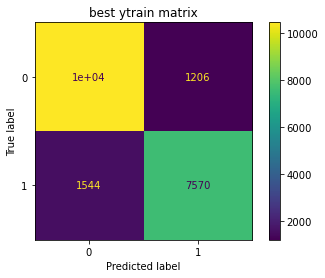

In [285]:
#ytrain
cm = confusion_matrix(y_train_enc, y_train_pred, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.best_estimator_.classes_)

disp.plot()
plt.title('best ytrain matrix')
plt.show()

- Ada 10000 model predik benar jika customer itu tidak puas/netral,dan 1206 seharusnya model predik bahwa itu customer puas
- Ada 7570 model predik benar jika customer itu puas,dan 1544 seharusnya model predik bahwa itu customer tidak puas/netral

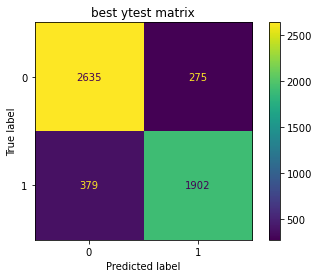

In [286]:
#ytest
cm = confusion_matrix(y_test_enc, y_test_pred, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.best_estimator_.classes_)

disp.plot()
plt.title('best ytest matrix')
plt.show()

- Ada 2635 model predik benar jika customer itu tidak puas/netral,dan 275 seharusnya model predik bahwa itu customer puas
- Ada 1902 model predik benar jika customer itu puas,dan 379 seharusnya model predik bahwa itu customer tidak puas/netral

In [287]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_pred))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_pred))

-----------train-------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11650
           1       0.86      0.83      0.85      9114

    accuracy                           0.87     20764
   macro avg       0.87      0.86      0.86     20764
weighted avg       0.87      0.87      0.87     20764

-----------test-------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2910
           1       0.87      0.83      0.85      2281

    accuracy                           0.87      5191
   macro avg       0.87      0.87      0.87      5191
weighted avg       0.87      0.87      0.87      5191



pada ytrain : 
- precision untuk 0 yaitu 0.87(87%) yg artinya  berhasil meprediksi 87% customer tidak puas dengan benar dan 13% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.86(86%) yg artinya  berhasil meprediksi 86% customer  puas dengan benar dan 14% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.90(90%) yg artinya  90% berhasil memprediksi customer yang tidak puas dengan benar,9% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.83(83%) yg artinya  83% berhasil memprediksi customer yang  puas dengan benar,17% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

pada ytest : 
- precision untuk 0 yaitu 0.87(87%) yg artinya  berhasil meprediksi 87% customer tidak puas dengan benar dan 13% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.87(87%) yg artinya  berhasil meprediksi 87% customer  puas dengan benar dan 13% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.91(91%) yg artinya  91% berhasil memprediksi customer yang tidak puas dengan benar,9% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.83(83%) yg artinya  83% berhasil memprediksi customer yang  puas dengan benar,17% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

- Kesalahan prediksi tersebut dapat mengakibat seseorang yang harus merasa tidak puas dengan pelayanan airline malah di predict puas

### SVC

In [304]:
#buat grid search lalu fit
gridSVC = GridSearchCV(premod_SVC, param_gridSVC, cv=5)
gridSVC.fit(X_train_final,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['Flight '
                                                                          'Distance']),
                                                                        ('numnormal',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('catnone',
                                                                         'passthrough',
                                                                         ['Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'O...
                                                                          'boarding',
                                                                          'Seat '
                                                                          'comfort',
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
                                                                          'service',
                                                                          'Cleanliness'])])),
                                       ('SVC', SVC())]),
             param_grid=[{'SVC__C': [1.0, 5, 10, 20],
                          'SVC__class_weight': ['balanced', 'None'],
                          'SVC__degree': [1, 5, 7],
                          'SVC__k

In [305]:
#mencari best estimator
best_gridSVC= gridSVC.best_estimator_
best_gridSVC

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Flight Distance']),
                                                 ('numnormal', StandardScaler(),
                                                  ['Age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('catnone', 'passthrough',
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('SVC',
                 SVC(C=20, class_weight='balanced', degree=1, max_iter=200))])

In [306]:
gridSVC.fit(X_train_final, y_train_enc)
print("Best parameters: {}".format(gridSVC.best_params_))
print("Best cross-validation score: {:.2f}".format(gridSVC.best_score_))

Best parameters: {'SVC__C': 20, 'SVC__class_weight': 'balanced', 'SVC__degree': 1, 'SVC__kernel': 'rbf', 'SVC__max_iter': 200}
Best cross-validation score: 0.73


In [307]:
#predict untuk best parameter
y_train_predSVC = gridSVC.best_estimator_.predict(X_train_final)
y_test_predSVC = gridSVC.best_estimator_.predict(X_test_final)

In [308]:
print('accuracy score train : ',accuracy_score(y_train_enc, y_train_predSVC))
print('accuracy score test : ',accuracy_score(y_test_enc, y_test_predSVC))

accuracy score train :  0.6878250818724716
accuracy score test :  0.6884993257561164


In [309]:
gridSVC.best_estimator_.classes_

array([0, 1])

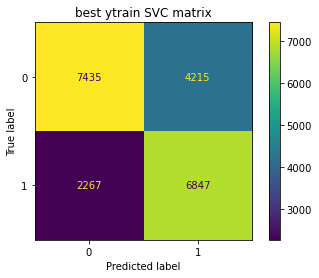

In [311]:
#ytrain
cm = confusion_matrix(y_train_enc, y_train_predSVC, labels=gridSVC.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridSVC.best_estimator_.classes_)

disp.plot()
plt.title('best ytrain SVC matrix')
plt.show()

- Ada 7435 model predik benar jika customer itu tidak puas/netral,dan 4215 seharusnya model predik bahwa itu customer puas
- Ada 6847 model predik benar jika customer itu puas,dan 2267 seharusnya model predik bahwa itu customer tidak puas/netral

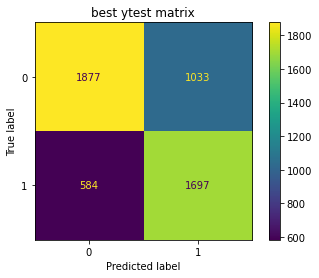

In [312]:
#ytest
cm = confusion_matrix(y_test_enc, y_test_predSVC, labels=gridSVC.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridSVC.best_estimator_.classes_)

disp.plot()
plt.title('best ytest matrix')
plt.show()

- Ada 1877 model predik benar jika customer itu tidak puas/netral,dan 1033 seharusnya model predik bahwa itu customer puas
- Ada 1697 model predik benar jika customer itu puas,dan 584 seharusnya model predik bahwa itu customer tidak puas/netral

In [313]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predSVC))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predSVC))

-----------train-------------
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     11650
           1       0.62      0.75      0.68      9114

    accuracy                           0.69     20764
   macro avg       0.69      0.69      0.69     20764
weighted avg       0.70      0.69      0.69     20764

-----------test-------------
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      2910
           1       0.62      0.74      0.68      2281

    accuracy                           0.69      5191
   macro avg       0.69      0.69      0.69      5191
weighted avg       0.70      0.69      0.69      5191



pada ytrain : 
- precision untuk 0 yaitu 0.77(77%) yg artinya  berhasil meprediksi 77% customer tidak puas dengan benar dan 23% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.62(62%) yg artinya  berhasil meprediksi 62% customer  puas dengan benar dan 38% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.64(64%) yg artinya  64% berhasil memprediksi customer yang tidak puas dengan benar,36% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.75(75%) yg artinya  75% berhasil memprediksi customer yang  puas dengan benar,25% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

pada ytest : 
- precision untuk 0 yaitu 0.76(76%) yg artinya  berhasil meprediksi 76% customer tidak puas dengan benar dan 24% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.62(62%) yg artinya  berhasil meprediksi62% customer  puas dengan benar dan 38% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.65(65%) yg artinya  65% berhasil memprediksi customer yang tidak puas dengan benar,35% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.74(74%) yg artinya  74% berhasil memprediksi customer yang  puas dengan benar,26% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

## DECISION TREE

In [318]:
#buat grid search lalu fit
gridDT = GridSearchCV(premod_DT,param_gridDT, cv=5)
gridDT.fit(X_train_final,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['Flight '
                                                                          'Distance']),
                                                                        ('numnormal',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('catnone',
                                                                         'passthrough',
                                                                         ['Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'O...
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
                                                                          'service',
                                                                          'Cleanliness'])])),
                                       ('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['entropy', 'gini'],
                          'DT__max_depth': [2, 4, 6, 8],
                          'DT__min_samples_leaf': [1, 2, 3, 4, 5],
                          'DT__min_samples_split': [2, 5, 8, 10],
                          'DT__splitter': ['best', 'random']}])

In [319]:
#mencari best estimator
best_gridDT= gridDT.best_estimator_
best_gridDT

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Flight Distance']),
                                                 ('numnormal', StandardScaler(),
                                                  ['Age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('catnone', 'passthrough',
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('DT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_split=10))])

In [320]:
gridDT.fit(X_train_final, y_train_enc)
print("Best parameters: {}".format(gridDT.best_params_))
print("Best cross-validation score: {:.2f}".format(gridDT.best_score_))

Best parameters: {'DT__criterion': 'entropy', 'DT__max_depth': 8, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 10, 'DT__splitter': 'best'}
Best cross-validation score: 0.94


In [321]:
#predict untuk best parameter
y_train_predDT = gridDT.best_estimator_.predict(X_train_final)
y_test_predDT = gridDT.best_estimator_.predict(X_test_final)

In [322]:
print('accuracy score train : ',accuracy_score(y_train_enc, y_train_predDT))
print('accuracy score test : ',accuracy_score(y_test_enc, y_test_predDT))

accuracy score train :  0.9393662107493739
accuracy score test :  0.9383548449239068


In [323]:
gridDT.best_estimator_.classes_

array([0, 1])

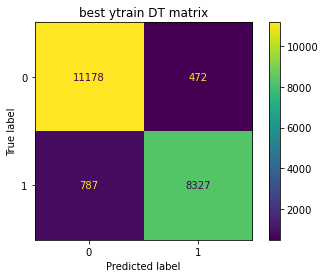

In [325]:
#ytrain
cm = confusion_matrix(y_train_enc, y_train_predDT, labels=gridDT.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridDT.best_estimator_.classes_)

disp.plot()
plt.title('best ytrain DT matrix')
plt.show()

- Ada 11178 model predik benar jika customer itu tidak puas/netral,dan 472 seharusnya model predik bahwa itu customer puas
- Ada 8327 model predik benar jika customer itu puas,dan 787 seharusnya model predik bahwa itu customer tidak puas/netral

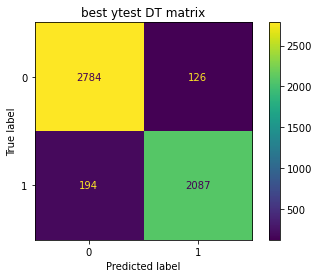

In [326]:
#ytest
cm = confusion_matrix(y_test_enc, y_test_predDT, labels=gridDT.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridDT.best_estimator_.classes_)

disp.plot()
plt.title('best ytest DT matrix')
plt.show()

- Ada 2784 model predik benar jika customer itu tidak puas/netral,dan 126 seharusnya model predik bahwa itu customer puas
- Ada 2087 model predik benar jika customer itu puas,dan 194 seharusnya model predik bahwa itu customer tidak puas/netral

In [327]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predDT))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predDT))

-----------train-------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11650
           1       0.95      0.91      0.93      9114

    accuracy                           0.94     20764
   macro avg       0.94      0.94      0.94     20764
weighted avg       0.94      0.94      0.94     20764

-----------test-------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2910
           1       0.94      0.91      0.93      2281

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



pada ytrain : 
- precision untuk 0 yaitu 0.93 yg artinya  berhasil meprediksi 93% customer tidak puas dengan benar dan 7% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.95 yg artinya  berhasil meprediksi 95% customer  puas dengan benar dan 5% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.96 yg artinya  96% berhasil memprediksi customer yang tidak puas dengan benar,4% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.91 yg artinya  91% berhasil memprediksi customer yang  puas dengan benar,9% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

pada ytest : 
- precision untuk 0 yaitu 0.93 yg artinya  berhasil meprediksi 93% customer tidak puas dengan benar dan 7% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.94 yg artinya  berhasil meprediksi 94% customer  puas dengan benar dan 6% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.96 yg artinya  96% berhasil memprediksi customer yang tidak puas dengan benar,4% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.91 yg artinya  91% berhasil memprediksi customer yang  puas dengan benar,9% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

### RANDOM FOREST CLASSIFIER

In [333]:
#buat grid search lalu fit
gridRF = GridSearchCV(premod_RF,param_gridRF, cv=5)
gridRF.fit(X_train_final,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['Flight '
                                                                          'Distance']),
                                                                        ('numnormal',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('catnone',
                                                                         'passthrough',
                                                                         ['Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'O...
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
                                                                          'service',
                                                                          'Cleanliness'])])),
                                       ('RF', RandomForestClassifier())]),
             param_grid=[{'RF__criterion': ['entropy', 'gini'],
                          'RF__max_depth': [4, 6, 8],
                          'RF__max_features': ['sqrt'],
                          'RF__min_samples_leaf': [1, 2, 3],
                          'RF__min_samples_split': [2, 5, 8],
                          'RF__n_estimators': [100, 200]}])

In [334]:
#mencari best estimator
best_gridRF= gridRF.best_estimator_
best_gridRF

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Flight Distance']),
                                                 ('numnormal', StandardScaler(),
                                                  ['Age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('catnone', 'passthrough',
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('RF',
                 RandomForestClassifier(max_depth=8, min_samples_split=5))])

In [335]:
gridRF.fit(X_train_final, y_train_enc)
print("Best parameters: {}".format(gridRF.best_params_))
print("Best cross-validation score: {:.2f}".format(gridRF.best_score_))

Best parameters: {'RF__criterion': 'gini', 'RF__max_depth': 8, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 8, 'RF__n_estimators': 200}
Best cross-validation score: 0.94


In [338]:
#predict untuk best parameter
y_train_predRF = gridRF.best_estimator_.predict(X_train_final)
y_test_predRF = gridRF.best_estimator_.predict(X_test_final)

In [339]:
print('accuracy score train : ',accuracy_score(y_train_enc, y_train_predRF))
print('accuracy score test : ',accuracy_score(y_test_enc, y_test_predRF))

accuracy score train :  0.9430745521094202
accuracy score test :  0.9406665382392603


In [336]:
gridRF.best_estimator_.classes_

array([0, 1])

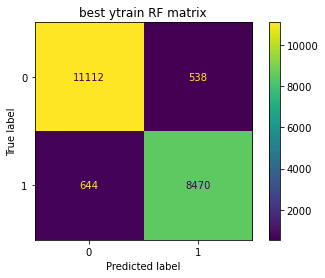

In [340]:
#ytrain
cm = confusion_matrix(y_train_enc, y_train_predRF, labels=gridRF.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridRF.best_estimator_.classes_)

disp.plot()
plt.title('best ytrain RF matrix')
plt.show()

- Ada 11112 model predik benar jika customer itu tidak puas/netral,dan 538 seharusnya model predik bahwa itu customer puas
- Ada 8470 model predik benar jika customer itu puas,dan 644 seharusnya model predik bahwa itu customer tidak puas/netral

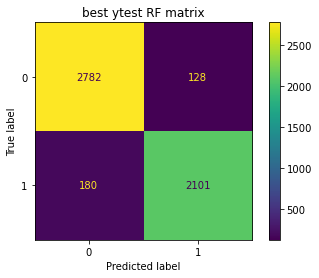

In [341]:
#ytest
cm = confusion_matrix(y_test_enc, y_test_predRF, labels=gridRF.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridRF.best_estimator_.classes_)

disp.plot()
plt.title('best ytest RF matrix')
plt.show()

- Ada 2782 model predik benar jika customer itu tidak puas/netral,dan 128 seharusnya model predik bahwa itu customer puas
- Ada 2101 model predik benar jika customer itu puas,dan 180 seharusnya model predik bahwa itu customer tidak puas/netral

In [342]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predRF))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predRF))

-----------train-------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11650
           1       0.94      0.93      0.93      9114

    accuracy                           0.94     20764
   macro avg       0.94      0.94      0.94     20764
weighted avg       0.94      0.94      0.94     20764

-----------test-------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2910
           1       0.94      0.92      0.93      2281

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



pada ytrain : 
- precision untuk 0 yaitu 0.95 yg artinya  berhasil meprediksi 94% customer tidak puas dengan benar dan 5% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.94 yg artinya  berhasil meprediksi 94% customer  puas dengan benar dan 6% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.95 yg artinya  95% berhasil memprediksi customer yang tidak puas dengan benar,5% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.93 yg artinya  93% berhasil memprediksi customer yang  puas dengan benar,7% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

pada ytest : 
- precision untuk 0 yaitu 0.94 yg artinya  berhasil meprediksi 94% customer tidak puas dengan benar dan 6% di salah meprediksi (kita memprediksi sebagai tidak puas, padahal customer tsb puas) 
- precision untuk 1 yaitu 0.94 yg artinya  berhasil meprediksi 94% customer  puas dengan benar dan 6% di salah meprediksi (kita memprediksi sebagai  puas, padahal customer tsb tidak puas/netral)

- recall untuk 0 yaitu 0.96 yg artinya  96% berhasil memprediksi customer yang tidak puas dengan benar,4% salah prediksi((kita prediksi puas, padahal harusnya dia masuk ke categori tidak puas
- rrecall untuk 1 yaitu 0.92 yg artinya  92% berhasil memprediksi customer yang  puas dengan benar,8% salah prediksi((kita prediksi tidak puas, padahal harusnya dia masuk ke categori  puas

# 9 MODEL INFERENCE

>Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [343]:
#show data inf
data_inf.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,5,4,5,3,1,3,5,3,8.0,neutral or dissatisfied
1,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,3,2,3,3,4,3,163,222.0,satisfied
2,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,2,3,2,2,1,0,0.0,neutral or dissatisfied
3,107959,Male,Loyal Customer,53,Business travel,Business,825,3,3,3,...,4,4,4,4,3,4,4,0,0.0,satisfied
4,119844,Male,Loyal Customer,53,Business travel,Eco,1095,3,5,5,...,3,1,1,3,3,4,3,0,0.0,neutral or dissatisfied


In [344]:
# mengecek missing value
data_inf.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## PREDICT LOGREG

In [348]:
y_pred_inf_LG = grid.best_estimator_.predict(data_inf)
y_pred_inf_LG

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [350]:
#kembalikan ke bentuk semula
y_pred_inf_LG = labelencoder.inverse_transform(y_pred_inf_LG)

In [351]:
# Create Dataframe columns=['payment nextmont'])
y_inf_pred_best_LG= pd.DataFrame(y_pred_inf_LG , columns=['satisfaction LG'])
# Concate between Inference-Set and Prediction
df_inf_LG = pd.concat([data_inf, y_inf_pred_best_LG ], axis=1)
df_inf_LG.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction LG
0,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,4,5,3,1,3,5,3,8.0,neutral or dissatisfied,neutral or dissatisfied
1,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,2,3,3,4,3,163,222.0,satisfied,neutral or dissatisfied
2,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,3,2,2,1,0,0.0,neutral or dissatisfied,neutral or dissatisfied


In [352]:
#compare prediction result and actual data
df_inf_LG[['satisfaction','satisfaction LG']]

,satisfaction,satisfaction LG
0,neutral or dissatisfied,neutral or dissatisfied
1,satisfied,neutral or dissatisfied
2,neutral or dissatisfied,neutral or dissatisfied
3,satisfied,satisfied
4,neutral or dissatisfied,neutral or dissatisfied
5,neutral or dissatisfied,neutral or dissatisfied
6,satisfied,satisfied
7,neutral or dissatisfied,neutral or dissatisfied
8,neutral or dissatisfied,neutral or dissatisfied
9,neutral or dissatisfied,neutral or dissatisfied


- Dari 21 data yang ada pada inference model logreg meprediksi 1 kesalahan pada model atau dapat dikatakan memiliki akurasi sekitar 95%%

## PREDICT SVC

In [354]:
y_pred_inf_SVC = gridSVC.best_estimator_.predict(data_inf)
y_pred_inf_SVC

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [355]:
#kembalikan ke bentuk semula
y_pred_inf_SVC = labelencoder.inverse_transform(y_pred_inf_SVC)

In [356]:
# Create Dataframe columns=['payment nextmont'])
y_inf_pred_best_SVC= pd.DataFrame(y_pred_inf_SVC , columns=['satisfaction SVC'])
# Concate between Inference-Set and Prediction
df_inf_SVC = pd.concat([data_inf, y_inf_pred_best_SVC ], axis=1)
df_inf_SVC.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction SVC
0,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,4,5,3,1,3,5,3,8.0,neutral or dissatisfied,neutral or dissatisfied
1,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,2,3,3,4,3,163,222.0,satisfied,satisfied
2,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,3,2,2,1,0,0.0,neutral or dissatisfied,satisfied


In [357]:
#compare prediction result and actual data
df_inf_SVC[['satisfaction','satisfaction SVC']]

,satisfaction,satisfaction SVC
0,neutral or dissatisfied,neutral or dissatisfied
1,satisfied,satisfied
2,neutral or dissatisfied,satisfied
3,satisfied,satisfied
4,neutral or dissatisfied,satisfied
5,neutral or dissatisfied,satisfied
6,satisfied,satisfied
7,neutral or dissatisfied,satisfied
8,neutral or dissatisfied,satisfied
9,neutral or dissatisfied,satisfied


- Dari 21 data yang ada pada inference model SVC meprediksi 9 kesalahan pada model atau dapat dikatakan memiliki akurasi sekitar 57%%

## PREDICT Decision Tree

In [358]:
y_pred_inf_DT = gridDT.best_estimator_.predict(data_inf)
y_pred_inf_DT

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [359]:
#kembalikan ke bentuk semula
y_pred_inf_DT = labelencoder.inverse_transform(y_pred_inf_DT)

In [360]:
# Create Dataframe columns=['payment nextmont'])
y_inf_pred_best_DT= pd.DataFrame(y_pred_inf_DT , columns=['satisfaction DT'])
# Concate between Inference-Set and Prediction
df_inf_DT = pd.concat([data_inf, y_inf_pred_best_DT ], axis=1)
df_inf_DT.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction DT
0,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,4,5,3,1,3,5,3,8.0,neutral or dissatisfied,neutral or dissatisfied
1,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,2,3,3,4,3,163,222.0,satisfied,neutral or dissatisfied
2,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,3,2,2,1,0,0.0,neutral or dissatisfied,neutral or dissatisfied


In [361]:
#compare prediction result and actual data
df_inf_DT[['satisfaction','satisfaction DT']]

,satisfaction,satisfaction DT
0,neutral or dissatisfied,neutral or dissatisfied
1,satisfied,neutral or dissatisfied
2,neutral or dissatisfied,neutral or dissatisfied
3,satisfied,satisfied
4,neutral or dissatisfied,neutral or dissatisfied
5,neutral or dissatisfied,neutral or dissatisfied
6,satisfied,satisfied
7,neutral or dissatisfied,neutral or dissatisfied
8,neutral or dissatisfied,neutral or dissatisfied
9,neutral or dissatisfied,neutral or dissatisfied


- Dari 21 data yang ada pada inference model DT meprediksi 1 kesalahan pada model atau dapat dikatakan memiliki akurasi sekitar 95%%

## PREDICT Random Forest

In [362]:
y_pred_inf_RF = gridRF.best_estimator_.predict(data_inf)
y_pred_inf_RF

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [363]:
#kembalikan ke bentuk semula
y_pred_inf_RF = labelencoder.inverse_transform(y_pred_inf_RF)

In [364]:
# Create Dataframe columns=['payment nextmont'])
y_inf_pred_best_RF= pd.DataFrame(y_pred_inf_RF , columns=['satisfaction RF'])
# Concate between Inference-Set and Prediction
df_inf_RF = pd.concat([data_inf, y_inf_pred_best_RF ], axis=1)
df_inf_RF.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction RF
0,39417,Male,Loyal Customer,28,Personal Travel,Business,129,4,2,4,...,4,5,3,1,3,5,3,8.0,neutral or dissatisfied,neutral or dissatisfied
1,22686,Female,Loyal Customer,38,Business travel,Eco,589,3,3,3,...,3,2,3,3,4,3,163,222.0,satisfied,neutral or dissatisfied
2,48146,Male,Loyal Customer,50,Business travel,Business,192,3,4,4,...,2,2,3,2,2,1,0,0.0,neutral or dissatisfied,neutral or dissatisfied


In [366]:
#compare prediction result and actual data
df_inf_RF[['satisfaction','satisfaction RF']]

,satisfaction,satisfaction RF
0,neutral or dissatisfied,neutral or dissatisfied
1,satisfied,neutral or dissatisfied
2,neutral or dissatisfied,neutral or dissatisfied
3,satisfied,satisfied
4,neutral or dissatisfied,neutral or dissatisfied
5,neutral or dissatisfied,neutral or dissatisfied
6,satisfied,satisfied
7,neutral or dissatisfied,neutral or dissatisfied
8,neutral or dissatisfied,neutral or dissatisfied
9,neutral or dissatisfied,neutral or dissatisfied


- Dari 21 data yang ada pada inference model RF meprediksi 1 kesalahan pada model atau dapat dikatakan memiliki akurasi sekitar 95%%

- Dari ketiga model didapatkan bahwa model SVC memilki akurasi hanya 57 % , sedangkan Logreg, decision Tree dan Random Forest sama sama memilki akurasi 95%
- Random Forest dipilih sebagi model terbaik karena memiliki akurasi yang tinggi dan memiliki cross validation paling tinggi diantara model lainnya yaitu 0,94

# 10 KESIMPULAN


- Dari proses preprocessing didapatkan: 
1. terdapat beberapa colum yang memiliki distribusi normal yaitu age,inflight service,departure time covenient,ease of online booking,gate location,food and drink,online boarding, seat comfort, inflight entertaiment,on board service,leg room service,checkin service,cleanliness
2. perlu dilakukanya label encoder pada target dikarenakan data yg berbentuk kategory
3. -terdapat juga memilki column skew yaitu flight distance, departure delay dan arrival delay

- Dari proses model evaluation dan analysis didapatkan:
1. Dari semua model: Logistic Regression, SV, Decision Tree, Random Forest. RF memilki model terbaik karena memilki validation score tertinggi yaitu 0,94

2. Dari accuracy score terlihat bahwa RF parameter memiliki akurasi yang lebih baik dengan perbedaan atara train dan test lebih kecil dibanding parameter model lainnya

3. Dari classification report terlihat bahwa RF parameter memiliki nilai recall  yang lebih baik dengan perbedaan atara train dan test lebih kecil dibanding Model parameter lainnya.


- Dari model inference:
1. Dari 21 data yang ada pada inference model meprediksi 2 kesalahan pada model atau dapat dikatakan memiliki akurasi sekitar 90%
2. saat di uji pada model inference kedua model memilki akurasi yang sama yaitu 90% yg berarti tidak ada perubhan signifikan menggunakan base parameter maupun best parameter

# 11 SAVING MODEL

In [382]:
# save the best pipeline
with open("pipe_RF.pkl", "wb") as model_file:
    joblib.dump(premod_RF, model_file)

In [383]:
with open('model_encoder.pkl', 'wb') as file_3:
    joblib.dump(labelencoder, file_3)

In [384]:
# save the best pipeline
with open("pipe_RF1.pkl", "wb") as model_file:
    joblib.dump(best_gridRF, model_file)